## Spotify & YouTube Data Analysis

Link to the data source: (https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube)

#### By: [Mohamed Mohsen](https://www.linkedin.com/in/mohamedmohsen01/)




The dataset comprises multiple songs by various Artists, encompassing a total of 20,718 rows (songs) and 28 columns such as Track, Album, Album type, Danceability, Energy, Key, Loudness, Speechiness, Acousticness, Instrumentalness, Valence, Tempo, Duration_ms, Streams, YouTube URL, Channel, Views, Comments, Likes, Licensed,...




In this analysis, I will be examining the dataset based on different features to determine their contribution.



## Features Interpretability


1. Danceability: How suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable).
2. Energy: Intensity and activity of a track (0.0 - 1.0). Energetic tracks feel fast, loud, and noisy.
3. Key: The track's musical key (-1 if not detected).
4. Loudness: Overall loudness of a track in decibels (dB) (-60 to 0 dB).
5. Speechiness: Presence of spoken words in a track (0.0-1.0). Higher values indicate speech-like content.
6. Acousticness: Confidence measure of track's acoustic nature (0.0-1.0).
7. Instrumentalness: Likelihood of a track containing no vocals (0.0-1.0).
8. Liveness: Presence of an audience in the recording (0.0-1.0). Higher values indicate live performance.
9. Valence: Positiveness conveyed by a track (0.0-1.0). High valence = positive, low valence = negative.
10. Tempo: Estimated tempo of a track in beats per minute (BPM).
11. Duration_ms: Duration of the track in milliseconds.
12. Streams: Number of streams of the song on Spotify.
13. Views: Number of views on YouTube.
14. Likes: Number of likes.
15. Comments: Number of comments on YouTube.





In [151]:
# Importing necessary libraries for data analysis and visualization.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") # let's ignore alerts for production.
import matplotlib.ticker as ticker  #Importing for Data tickers


plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [180]:
# setting color palettes to spotify and YouTube visualizations
spotify_palette = sns.light_palette('g', n_colors=10, reverse=True)
youtube_palette = sns.light_palette('r', n_colors=10, reverse=True)

In [34]:
# Importing the dataset from a CSV file.

df = pd.read_csv('D:\Data Analyst Portfolio\Python Projects\Spotify-Youtube Analysis/Spotify_Youtube.csv')

# Data Pre-Processing

In [35]:
# list of the first five rows
df.head()

Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                  Plastic Beach      album   
4                                       Gorillaz      album   

                                    Uri  Danceability  Energy   Key  Loudness  \
0  spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0    -6.679   
1  spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0    -5.815   
2  spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0    -3.930   
3  spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0    -5.810   
4  spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0    -8.627   

   Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
0       0.1770      0.008360          0.002330    0.6130    0.772  138.559   
1       0.0302      0.086900          0.000687    0.0463    0.852   92.761   
2       0.0522      0.042500          0.046900    0.1160    0.551  108.014   
3       0.0260      0.000015          0.509000    0.0640    0.578  120.423   
4       0.1710      0.025300          0.000000    0.0698    0.525  167.953   

   Duration_ms                                  Url_youtube  \
0     222640.0  https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1     200173.0  https://www.youtube.com/watch?v=yYDmaexVHic   
2     215150.0  https://www.youtube.com/watch?v=qJa-VFwPpYA   
3     233867.0  https://www.youtube.com/watch?v=04mfKJWDSzI   
4     340920.0  https://www.youtube.com/watch?v=1V_xRb0x9aw   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   
3     Gorillaz - On Melancholy Hill (Official Video)  Gorillaz  211754952.0   
4         Gorillaz - Clint Eastwood (Official Video)  Gorillaz  618480958.0   

       Likes  Comments                                        Description  \
0  6220896.0  169907.0  Official HD Video for Gorillaz' fantastic trac...   
1  1079128.0   31003.0  The official video for Gorillaz - Rhinestone E...   
2   282142.0    7399.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3  1788577.0   55229.0  Follow Gorillaz online:\nhttp://gorillaz.com \...   
4  6197318.0  155930.0  The official music video for Gorillaz - Clint ...   

  Licensed official_video        Stream  
0     True           True  1.040235e+09  
1     True           True  3.100837e+08  
2     True           True  6.306347e+07  
3     True           True  4.346636e+08  
4     True           True  6.172597e+08

In [36]:
# list of the last five rows
df.tail()

Unnamed: 0       Artist  \
20713       20713  SICK LEGEND   
20714       20714  SICK LEGEND   
20715       20715  SICK LEGEND   
20716       20716  SICK LEGEND   
20717       20717  SICK LEGEND   

                                             Url_spotify  \
20713  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20714  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20715  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20716  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20717  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   

                                Track                           Album  \
20713            JUST DANCE HARDSTYLE            JUST DANCE HARDSTYLE   
20714  SET FIRE TO THE RAIN HARDSTYLE  SET FIRE TO THE RAIN HARDSTYLE   
20715       OUTSIDE HARDSTYLE SPED UP       OUTSIDE HARDSTYLE SPED UP   
20716             ONLY GIRL HARDSTYLE             ONLY GIRL HARDSTYLE   
20717              MISS YOU HARDSTYLE              MISS YOU HARDSTYLE   

      Album_type                                   Uri  Danceability  Energy  \
20713     single  spotify:track:0RtcKQGyI4hr8FgFH1TuYG         0.582   0.926   
20714     single  spotify:track:3rHvPA8lUnPBkaLyPOc0VV         0.531   0.936   
20715     single  spotify:track:4jk00YxPtPbhvHJE9N4ddv         0.443   0.830   
20716     single  spotify:track:5EyErbpsugWliX006eTDex         0.417   0.767   
20717     single  spotify:track:6lOn0jz1QpjcWeXo1oMm0k         0.498   0.938   

       Key  Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  \
20713  5.0    -6.344       0.0328       0.44800            0.0000    0.0839   
20714  4.0    -1.786       0.1370       0.02800            0.0000    0.0923   
20715  4.0    -4.679       0.0647       0.02430            0.0000    0.1540   
20716  9.0    -4.004       0.4190       0.35600            0.0184    0.1080   
20717  6.0    -4.543       0.1070       0.00277            0.9110    0.1360   

       Valence    Tempo  Duration_ms  \
20713   0.6580   90.002      94667.0   
20714   0.6570  174.869     150857.0   
20715   0.4190  168.388     136842.0   
20716   0.5390  155.378     108387.0   
20717   0.0787  160.067     181500.0   

                                       Url_youtube  \
20713  https://www.youtube.com/watch?v=5SHmKFKlNqI   
20714  https://www.youtube.com/watch?v=ocTH6KxllDQ   
20715  https://www.youtube.com/watch?v=5wFhE-HY0hg   
20716  https://www.youtube.com/watch?v=VMFLbFRNCn0   
20717  https://www.youtube.com/watch?v=zau0dckCFi0   

                                Title              Channel     Views   Likes  \
20713            JUST DANCE HARDSTYLE  SICK LEGEND - Topic   71678.0  1113.0   
20714  SET FIRE TO THE RAIN HARDSTYLE  SICK LEGEND - Topic  164741.0  2019.0   
20715       OUTSIDE HARDSTYLE SPED UP  SICK LEGEND - Topic   35646.0   329.0   
20716             ONLY GIRL HARDSTYLE  SICK LEGEND - Topic    6533.0    88.0   
20717              MISS YOU HARDSTYLE  SICK LEGEND - Topic  158697.0  2484.0   

       Comments                                        Description Licensed  \
20713       0.0  Provided to YouTube by Routenote\n\nJUST DANCE...     True   
20714       0.0  Provided to YouTube by Routenote\n\nSET FIRE T...     True   
20715       0.0  Provided to YouTube by Routenote\n\nOUTSIDE HA...     True   
20716       0.0  Provided to YouTube by Routenote\n\nONLY GIRL ...     True   
20717       0.0  Provided to YouTube by Routenote\n\nMISS YOU H...     True   

      official_video      Stream  
20713           True   9227144.0  
20714           True  10898176.0  
20715           True   6226110.0  
20716           True   6873961.0  
20717           True   5695584.0

In [37]:
# It is also a good practice to know the columns and their corresponding data types along with finding whether they contain null values or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

Upon reviewing the provided data, we observe that the dataset consists of 28 columns and 20,718 rows.

It is worth noting that certain columns contain null values. To conduct a comprehensive analysis, it is recommended to assess each column individually and take appropriate measures to address any missing data.

Moreover, by delving into the details of each column, valuable insights regarding Spotify or YouTube data could potentially be extracted, offering further valuable information.

In [38]:
# To gain insights into the dataset and obtain a comprehensive statistical summary, it is beneficial to explore and analyze the data.
df.describe()

Unnamed: 0  Danceability        Energy           Key      Loudness  \
count  20718.000000  20716.000000  20716.000000  20716.000000  20716.000000   
mean   10358.500000      0.619777      0.635250      5.300348     -7.671680   
std     5980.915774      0.165272      0.214147      3.576449      4.632749   
min        0.000000      0.000000      0.000020      0.000000    -46.251000   
25%     5179.250000      0.518000      0.507000      2.000000     -8.858000   
50%    10358.500000      0.637000      0.666000      5.000000     -6.536000   
75%    15537.750000      0.740250      0.798000      8.000000     -4.931000   
max    20717.000000      0.975000      1.000000     11.000000      0.920000   

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  20716.000000  20716.000000      20716.000000  20716.000000   
mean       0.096456      0.291535          0.055962      0.193521   
std        0.111960      0.286299          0.193262      0.168531   
min        0.000000      0.000001          0.000000      0.014500   
25%        0.035700      0.045200          0.000000      0.094100   
50%        0.050500      0.193000          0.000002      0.125000   
75%        0.103000      0.477250          0.000463      0.237000   
max        0.964000      0.996000          1.000000      1.000000   

            Valence         Tempo   Duration_ms         Views         Likes  \
count  20716.000000  20716.000000  2.071600e+04  2.024800e+04  2.017700e+04   
mean       0.529853    120.638340  2.247176e+05  9.393782e+07  6.633411e+05   
std        0.245441     29.579018  1.247905e+05  2.746443e+08  1.789324e+06   
min        0.000000      0.000000  3.098500e+04  0.000000e+00  0.000000e+00   
25%        0.339000     97.002000  1.800095e+05  1.826002e+06  2.158100e+04   
50%        0.537000    119.965000  2.132845e+05  1.450110e+07  1.244810e+05   
75%        0.726250    139.935000  2.524430e+05  7.039975e+07  5.221480e+05   
max        0.993000    243.372000  4.676058e+06  8.079649e+09  5.078865e+07   

           Comments        Stream  
count  2.014900e+04  2.014200e+04  
mean   2.751899e+04  1.359422e+08  
std    1.932347e+05  2.441321e+08  
min    0.000000e+00  6.574000e+03  
25%    5.090000e+02  1.767486e+07  
50%    3.277000e+03  4.968298e+07  
75%    1.436000e+04  1.383581e+08  
max    1.608314e+07  3.386520e+09

In [39]:
# shape
df.shape

(20718, 28)

In [40]:
#Displaying all columns in the dataset
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

# Cleaning the Data

In [41]:
# Upon reviewing the data, it appears that there is unnamed column labeled 'Unnamed: 0' which is unnecessary column in our analysis. So let's proceed by removing this column. 
# Additionally, there are other columns in the dataset that are not needed in our analysis. Hence, we will exclude them as well.

df.drop(columns=['Unnamed: 0','Url_spotify','Uri','Url_youtube'], axis=1, inplace=True)

In [42]:
# Number of unique values in each column
df.nunique()

Artist               2079
Track               17841
Album               11937
Album_type              3
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

In [43]:
#checking the number of null values in each column.
df.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [44]:
# So let's remove any null value in the dataset
df.dropna(inplace=True)

In [45]:
# let's recheck if there's still any missing values
df.isna().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

We see that there is no null values in the dataset after cleaning them.

In [46]:
# So let's Check for duplicates
df[df.duplicated(subset=['Artist','Track'])]

Artist                                            Track  \
773         Whitney Houston                                  How Will I Know   
1625     Earth, Wind & Fire                                          Fantasy   
1695                 Shaggy                                     It Wasn't Me   
1696                 Shaggy                                    Hey Sexy Lady   
1824   Ludwig van Beethoven  Bagatelle No. 25 in A Minor, WoO 59 "Für Elise"   
...                     ...                                              ...   
17603               Seafret                                         Atlantis   
18133        Shiloh Dynasty                                  Losing Interest   
19010              Soolking                                       Suavemente   
19074                 Beret                                           Vuelve   
20595            João Gomes                                            Dengo   

                                                   Album   Album_type  \
773                                      Whitney Houston        album   
1625                                          All 'N All        album   
1695                                        It Wasn't Me       single   
1696                  Riddim Driven: Sexy Lady Explosion  compilation   
1824   Beethoven: Bagatelle No. 25 in A Minor, WoO 59...       single   
...                                                  ...          ...   
17603                                           Atlantis       single   
18133                                    Losing Interest       single   
19010                                         Suavemente       single   
19074                                             Prisma        album   
20595                                              Dengo       single   

       Danceability  Energy   Key  Loudness  Speechiness  Acousticness  \
773           0.832  0.5440   6.0   -12.697       0.0442        0.2010   
1625          0.608  0.7450   4.0    -8.772       0.0857        0.3230   
1695          0.727  0.9210  11.0    -3.212       0.0462        0.1260   
1696          0.929  0.5570  10.0    -9.404       0.2890        0.1660   
1824          0.230  0.0487   5.0   -27.675       0.0412        0.9860   
...             ...     ...   ...       ...          ...           ...   
17603         0.431  0.8020   8.0    -2.665       0.0472        0.0333   
18133         0.960  0.3600  10.0   -16.192       0.1550        0.6730   
19010         0.854  0.6820   7.0    -5.212       0.0530        0.3350   
19074         0.706  0.4780  11.0    -6.962       0.1540        0.6090   
20595         0.742  0.4670   7.0    -8.089       0.0432        0.5890   

       Instrumentalness  Liveness  Valence    Tempo  Duration_ms  \
773            0.000139    0.6320    0.928  119.490     275533.0   
1625           0.004280    0.1350    0.614   88.941     277413.0   
1695           0.000000    0.0942    0.508  120.049     178500.0   
1696           0.000000    0.1900    0.685  102.930     226240.0   
1824           0.945000    0.0679    0.101  134.839     203656.0   
...                 ...       ...      ...      ...          ...   
17603          0.000000    0.3520    0.472  101.932     198824.0   
18133          0.017700    0.2930    0.639  114.927     136696.0   
19010          0.000926    0.0569    0.507  140.019     157714.0   
19074          0.000000    0.1150    0.330   78.528     153050.0   
20595          0.000000    0.1030    0.368  110.985     214054.0   

                                                   Title  \
773    Whitney Houston - How Will I Know (Official Vi...   
1625   Earth, Wind & Fire - September (Official HD Vi...   
1695   Shaggy It Wasn't Me (Official Music Video) (un...   
1696   Shaggy - Hey Sexy Lady ft. Brian & Tony Gold (...   
1824                               Beethoven - Für Elise   
...                                                  ...   
17603                Seafret - Atlantis (Official Video) 

So we see some duplicate Artist names but with different songs and different Albums so they are not true duplicates.

In [47]:
# Performing a quick check for duplicates in the dataset, but they won't be dropped since they are not true duplicates
df[df['Track'] == 'Fantasy'][['Track','Artist','Album']]

Track              Artist                                  Album
451    Fantasy        Mariah Carey                               Daydream
1621   Fantasy  Earth, Wind & Fire  The Best Of Earth, Wind & Fire Vol. 1
1625   Fantasy  Earth, Wind & Fire                             All 'N All
12383  Fantasy               Klaas                                Fantasy
18999  Fantasy               Bazzi                                 COSMIC

In [48]:
df[df['Track'] == 'How Will I Know'][['Track','Artist','Album']]

Track           Artist  \
772    How Will I Know  Whitney Houston   
773    How Will I Know  Whitney Houston   
15531  How Will I Know     Clean Bandit   

                                                   Album  
772    I Wanna Dance With Somebody (The Movie: Whitne...  
773                                      Whitney Houston  
15531  I Wanna Dance With Somebody (The Movie: Whitne...

In [49]:
# let's make sure that there's no duplicates in the dataset
df.duplicated().sum()

0

In [50]:
# Verifying the dataset dimensions to determine the number of columns and rows after removing null values and columns that we don't need in the analysis.
df.shape

(19170, 24)

After removing the unnecessary columns and null values from columns ,now we have 19170 rows and 24 columns.

In [51]:
# the columns 'Views', ' Likes', 'Comments' and 'Key' are floating data type in the dataset, so let's convert them to an intrger data type.
# the colums 'official_video' and 'Licensed' are string data type in the dataset, so Let's convert them to a boolean data type using the follwing code:

df['Likes'] = df['Likes'].astype('int')
df['Views'] = df['Views'].astype('int')
df['Comments'] = df['Comments'].astype('int')
df['Stream'] = df['Stream'].astype('int')
df['Key'] = df['Key'].astype('int')
df['official_video'] = df['official_video'].astype('bool')
df['Licensed'] = df['Licensed'].astype('bool')


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19170 entries, 0 to 20717
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19170 non-null  object 
 1   Track             19170 non-null  object 
 2   Album             19170 non-null  object 
 3   Album_type        19170 non-null  object 
 4   Danceability      19170 non-null  float64
 5   Energy            19170 non-null  float64
 6   Key               19170 non-null  int32  
 7   Loudness          19170 non-null  float64
 8   Speechiness       19170 non-null  float64
 9   Acousticness      19170 non-null  float64
 10  Instrumentalness  19170 non-null  float64
 11  Liveness          19170 non-null  float64
 12  Valence           19170 non-null  float64
 13  Tempo             19170 non-null  float64
 14  Duration_ms       19170 non-null  float64
 15  Title             19170 non-null  object 
 16  Channel           19170 non-null  object

The data is now ready for analysis.

# Exploratory Data Analysis (EDA)

In [53]:
df.head(10)

Artist                                              Track  \
0  Gorillaz                                     Feel Good Inc.   
1  Gorillaz                                    Rhinestone Eyes   
2  Gorillaz      New Gold (feat. Tame Impala and Bootie Brown)   
3  Gorillaz                                 On Melancholy Hill   
4  Gorillaz                                     Clint Eastwood   
5  Gorillaz                                               DARE   
6  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown) ...   
7  Gorillaz                 She's My Collar (feat. Kali Uchis)   
8  Gorillaz                  Cracker Island (feat. Thundercat)   
9  Gorillaz                                        Dirty Harry   

                                               Album Album_type  Danceability  \
0                                         Demon Days      album         0.818   
1                                      Plastic Beach      album         0.676   
2      New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                      Plastic Beach      album         0.689   
4                                           Gorillaz      album         0.663   
5                                         Demon Days      album         0.760   
6  New Gold (feat. Tame Impala and Bootie Brown) ...     single         0.716   
7                                    Humanz (Deluxe)      album         0.726   
8                  Cracker Island (feat. Thundercat)     single         0.741   
9                                         Demon Days      album         0.625   

   Energy  Key  Loudness  Speechiness  Acousticness  Instrumentalness  \
0   0.705    6    -6.679       0.1770      0.008360          0.002330   
1   0.703    8    -5.815       0.0302      0.086900          0.000687   
2   0.923    1    -3.930       0.0522      0.042500          0.046900   
3   0.739    2    -5.810       0.0260      0.000015          0.509000   
4   0.694   10    -8.627       0.1710      0.025300          0.000000   
5   0.891   11    -5.852       0.0372      0.022900          0.086900   
6   0.897    4    -7.185       0.0629      0.012000          0.262000   
7   0.815   11    -5.886       0.0313      0.007990          0.081000   
8   0.913    2    -3.340       0.0465      0.003430          0.103000   
9   0.877   10    -7.176       0.1620      0.031500          0.081100   

   Liveness  Valence    Tempo  Duration_ms  \
0    0.6130    0.772  138.559     222640.0   
1    0.0463    0.852   92.761     200173.0   
2    0.1160    0.551  108.014     215150.0   
3    0.0640    0.578  120.423     233867.0   
4    0.0698    0.525  167.953     340920.0   
5    0.2980    0.966  120.264     245000.0   
6    0.3250    0.358  127.030     274142.0   
7    0.1120    0.462  140.158     209560.0   
8    0.3250    0.643  120.012     213750.0   
9    0.6720    0.865  192.296     230426.0   

                                               Title     Channel      Views  \
0         Gorillaz - Feel Good Inc. (Official Video)    Gorillaz  693555221   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...    Gorillaz   72011645   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...    Gorillaz    8435055   
3     Gorillaz - On Melancholy Hill (Official Video)    Gorillaz  211754952   
4         Gorillaz - Clint Eastwood (Official Video)    Gorillaz  618480958   
5                   Gorillaz - DARE (Official Video)    Gorillaz  259021161   
6  Gorillaz - New Gold ft. Tame Impala, Bootie Br...   Dom Dolla     451996   
7                    Gorillaz - She's My Collar [HQ]  SalvaMuñox    1010982   
8  Gorillaz - Cracker Island ft. Thundercat (Offi...    Gorillaz   24459820   
9            Gorillaz - Dirty Harry (Official Video)    Gorillaz  154761056   

     Likes  Comments                                        Description  \
0  6220896    169907  Official HD Video for Gorillaz' fantastic trac...   
1  1079128     31003  The official video for Gorillaz -

### Top 10 Artists with the highest total Streams on Spotify

In [464]:
s = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

In [465]:
s

Artist
Dua Lipa         13408076274
XXXTENTACION     12011910355
Coldplay         11778478236
Khalid           11386839915
Ariana Grande    10857411888
Maroon 5         10722507616
Bruno Mars        9963334629
Eminem            9748587734
Calvin Harris     9548541851
Queen             9384533757
Name: Stream, dtype: int64

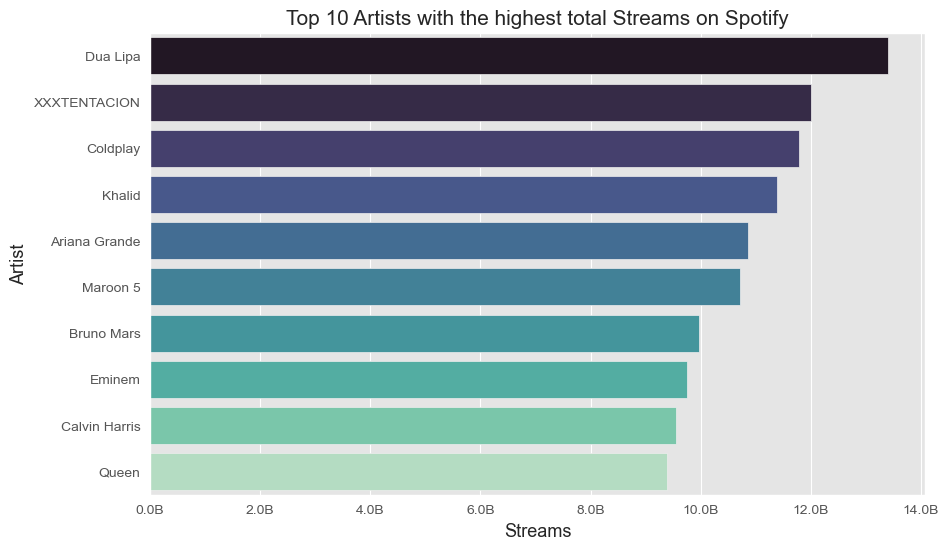

In [467]:
# Creating a bar plot to visualize the top 10 Artists with the highest total Streams on Spotify.
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=s.values, y=s.index, palette="mako")

# Formatting the X-axis to display values in Billions.
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}B'.format(value*1e-9)))
ax.set_title('Top 10 Artists with the highest total Streams on Spotify', fontsize=15)
ax.set_xlabel('Streams', fontsize=13)
ax.set_ylabel('Artist', fontsize=13)

plt.show()

##### Based on the analysis, the top artists with the highest total streams are as follows:

1. Dua Lipa: Taking the lead with an impressive 13.4 billion streams.
2. XXXTENTACION: Securing the second position with 12.02 billion streams.
3. Coldplay: Holding the third spot with 11.77 billion streams.
4. Khalid: Claiming the fourth position with 11.3 billion streams.
5. Ariana Grande: Emerging in the fifth position with 10.85 billion streams.
6. Maroon 5: Occupying the sixth spot with 10.7 billion streams.
7. Bruno Mars: Claiming the seventh position with almost 10 billion streams
8. Eminem: claiming the eighth position with 9.7 billion of streams
9. Calvin Harris: claiming the ninth position with 9.5 billion of streams
10. Queen: claiming the tenth position with 9.3 billion of streams

### Retrieving the top 10 Artists with the highest total views on YouTube

In [186]:
v = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]

In [187]:
v

Artist
Bruno Mars                 10231841530
Macklemore & Ryan Lewis    10122055560
Coldplay                    9997277884
BLACKPINK                   9392961989
J Balvin                    8464877693
Nicki Minaj                 8017064073
Earth, Wind & Fire          6414076580
Post Malone                 6394420209
One Direction               6337601549
Nicky Jam                   6321868119
Name: Views, dtype: int64

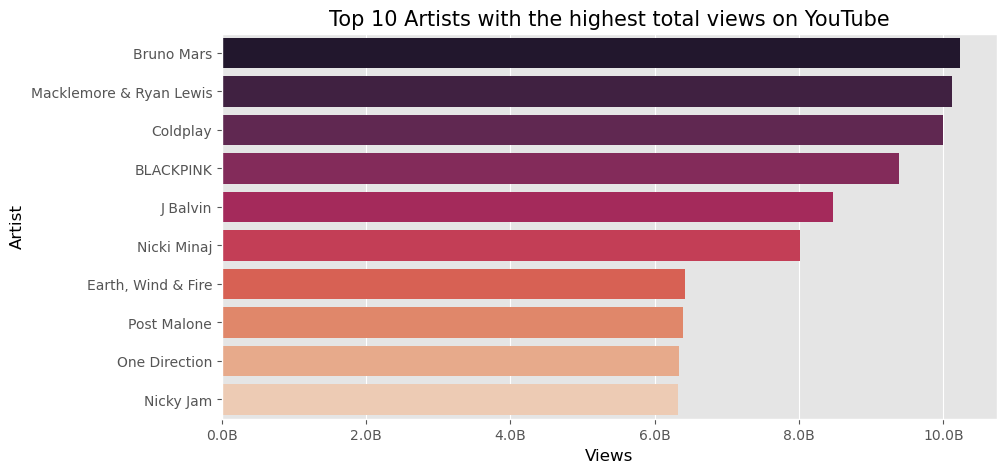

In [59]:
# Creating a bar plot to visualize the top 10 Artists with the highest total views on YouTube.
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=v.values, y=v.index, palette='rocket')

# Formatting the X-axis to display values in Billions.
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}B'.format(value*1e-9)))
ax.set_title('Top 10 Artists with the highest total views on YouTube', fontsize=15)
ax.set_xlabel('Views', fontsize=12)
ax.set_ylabel('Artist', fontsize=12)

plt.show()

##### The analysis reveals the following top Artists based on their total views:

1. Bruno Mars: With a staggering over 10.23 billion views, he emerges as the most viewed Artist.

2. Macklemore & Ryan Lewis: Securing the second position, they garnered over 10.12 billion views.

3. Coldplay: claims the third spot with almost 10 billion views.

4. BLACKPINK: Displaying strong popularity, he takes the fourth position with 9.4 billion views.

5. J Balvin: Noteworthy, he completes the top 5 artists with an impressive 8.4 billion views.

6. Nicki Minaj, Earth, Wind & Fire, and Post Malone: Occupying the sixth to eighth positions, these Artists attained 8 billion,    6.4 billion, and 6.3 billion views respectively.

7. One Direction and Nicky Jam: Rounding off the top 10 artists, they secured 6.33 billion and 6.32 billion views respectively.

### Top 10 Artists with the highest total number of comments

In [353]:
c = df.groupby('Artist')['Comments'].sum().sort_values(ascending=False).head(10)

In [354]:
c

Artist
BTS              39542659
BLACKPINK        19605027
Stray Kids        8458365
TWICE             8384985
PSY               7311608
Justin Bieber     7258967
EXO               6981950
Halsey            6981661
One Direction     6360892
Luis Fonsi        4703428
Name: Comments, dtype: int32

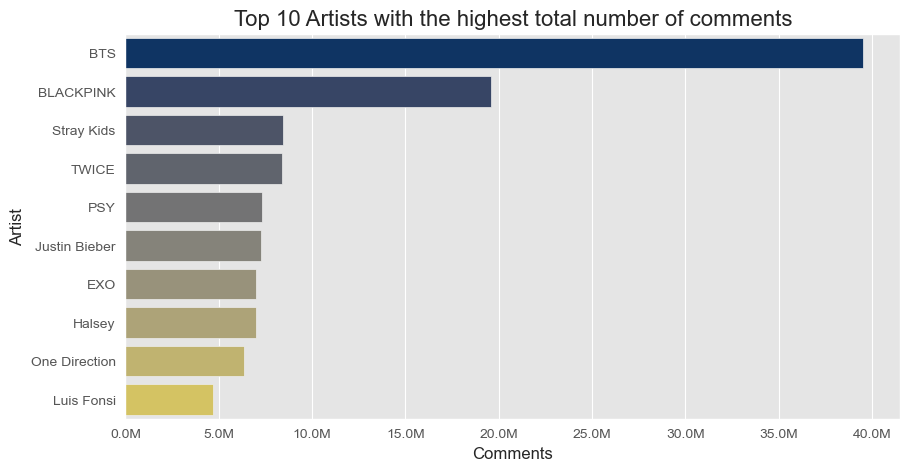

In [355]:
# visualizing the top 10 Artists with the highest total number of Comments on YouTube.
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=c.values, y=c.index, palette='cividis')

# Formatting the X-axis to display values in Millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}M'.format(value*1e-6)))
ax.set_title('Top 10 Artists with the highest total number of comments', fontsize=16)
ax.set_xlabel('Comments', fontsize=12)
ax.set_ylabel('Artist', fontsize=12)

plt.show()

#### Top Artists Based on Total Comments:
1. BTS dominates the charts with an astonishing 39.5 million comments, securing the top position.

2. BLACKPINK follows closely in the second spot, accumulating an impressive 19.6 million comments.

3. Stray Kids claims the third position with a significant 8.4 million comments.

4. TWICE takes the fourth spot, receiving 8.3 million comments.

5. PSY secures the fifth position with nearly 7.3 million comments.

6. Justin Bieber impresses in the sixth place with 7.2 million comments.

7. EXO occupies the seventh spot, attaining almost 7 million comments.

8. Halsey secures the eighth position with a commendable 6.9 million comments.

9. One Direction claims the ninth spot, amassing nearly 6.3 million comments.

10. Luis Fonsi rounds out the top ten with 4.7 million comments.

###  Top 10 Artists with the highest total likes on YouTube

In [193]:
like = df.groupby('Artist')['Likes'].sum().reset_index().sort_values('Likes',ascending=False).head(10)

In [194]:
like

Artist      Likes
151               BTS  139403808
149         BLACKPINK  132302505
329      Charlie Puth   86336925
516        Ed Sheeran   83543319
908     Justin Bieber   78579227
199     Billie Eilish   73338537
764   Imagine Dragons   72274477
59        Alan Walker   67977702
411          DJ Snake   67775831
1129       Luis Fonsi   66908489

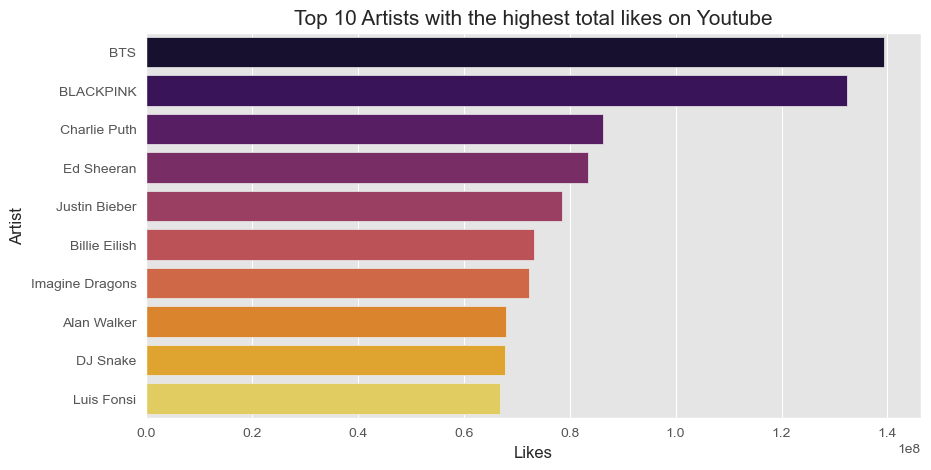

In [356]:
# Creating a bar plot to visualize the Top 10 Artists with the Highest Total Likes on YouTube
fig = plt.figure(figsize=(10,5))
sns.barplot(x='Likes',y='Artist',data=like, palette="inferno")
plt.title('Top 10 Artists with the highest total likes on Youtube', fontsize=15)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.show()

### Top 10 Songs with the highest total Streams on Spotify

In [196]:
s = df.groupby('Track')['Stream'].sum().sort_values(ascending=False)[:10]

In [197]:
s

Track
Can't Hold Us (feat. Ray Dalton)                               5225629104
Happier                                                        4757615430
The Middle                                                     4566882832
Eastside (with Halsey & Khalid)                                4274887533
lovely (with Khalid)                                           4221147558
Enemy (with JID) - from the series Arcane League of Legends    4182327816
Cold Heart - PNAU Remix                                        4072975437
Something Just Like This                                       4061651388
Shallow                                                        4008677756
Peaches (feat. Daniel Caesar & Giveon)                         4007515671
Name: Stream, dtype: int64

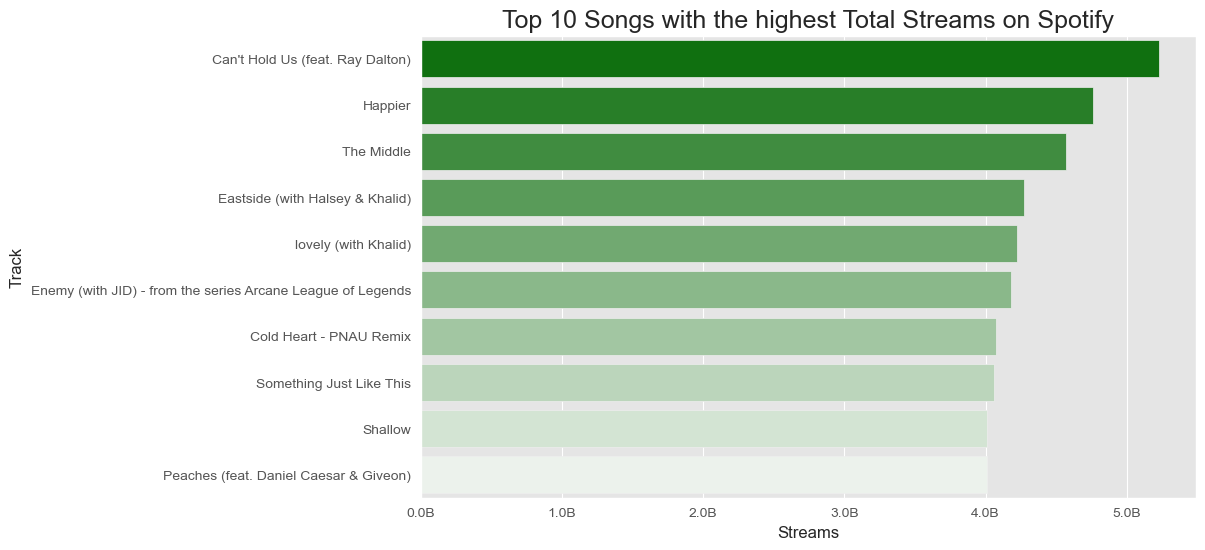

In [203]:
# Creating a bar plot to visualize the Top 10 Songs by the Highest Total Streams on Spotify.
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=s.values, y=s.index, palette= spotify_palette)

# Formatting the X-axis to display values in Billions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}B'.format(value*1e-9)))
ax.set_title('Top 10 Songs with the highest Total Streams on Spotify', fontsize=18)
ax.set_xlabel('Streams', fontsize=12)
ax.set_ylabel('Track', fontsize=12)

plt.show()

### Retrieving the top 10 Artists with the highest average total views on YouTube and streams on Spotify

In [361]:
z = df.groupby('Artist').agg({'Likes':'mean','Stream':'mean'}).reset_index().sort_values(by=['Likes','Stream'],ascending=False)[:10]

In [362]:
z

Artist         Likes        Stream
151              BTS  1.394038e+07  6.367910e+08
149        BLACKPINK  1.323025e+07  4.015972e+08
908    Justin Bieber  8.731025e+06  6.231822e+08
329     Charlie Puth  8.633692e+06  7.041187e+08
516       Ed Sheeran  8.354332e+06  1.234013e+07
199    Billie Eilish  7.333854e+06  6.396675e+08
415     Daddy Yankee  7.276161e+06  5.486072e+08
764  Imagine Dragons  7.227448e+06  7.341555e+08
59       Alan Walker  6.797770e+06  4.692611e+08
411         DJ Snake  6.777583e+06  7.739463e+08

### Top 10 Songs with the highest total number of comments  on YouTube

In [363]:
cs = df.groupby('Track')['Comments'].sum().sort_values(ascending=False)[:10]

In [364]:
cs

Track
Dynamite                              16138145
Boy With Luv (feat. Halsey)           13071440
Butter                                 9131761
Despacito                              8505582
Gangnam Style (강남스타일)                  5331537
How You Like That                      5130725
Baby                                   4817531
See You Again (feat. Charlie Puth)     4254691
Pink Venom                             3637659
Permission to Dance                    3486944
Name: Comments, dtype: int32

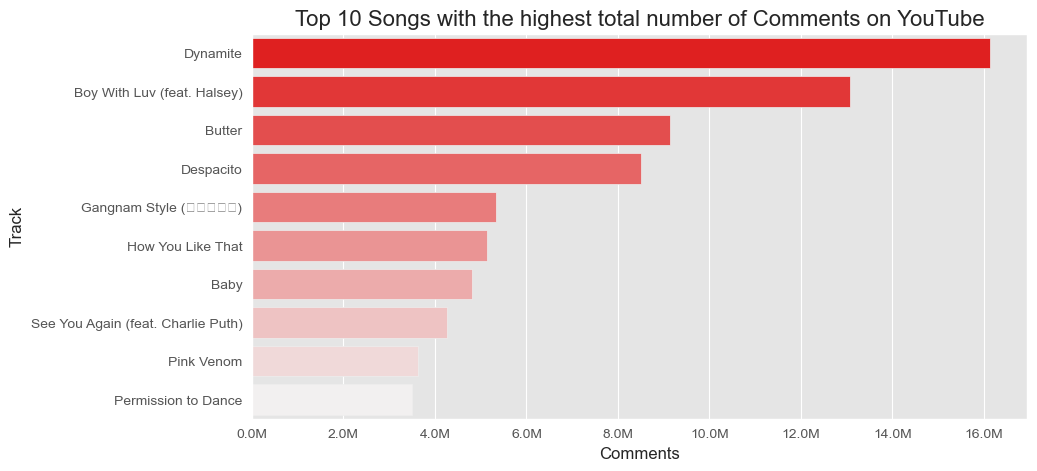

In [366]:
# Visualzing the Top 10 Songs with the highest total number of Comments on YouTube
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=cs.values, y=cs.index, palette=youtube_palette)

# Formatting the X-axis to display values in Millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}M'.format(value*1e-6)))
ax.set_title('Top 10 Songs with the highest total number of Comments on YouTube', fontsize=16)
ax.set_xlabel('Comments', fontsize=12)
ax.set_ylabel('Track', fontsize=12)
plt.show()

### Top 10 Songs with highest total likes on YouTube

In [367]:
sl = df.groupby('Track')['Likes'].sum().sort_values(ascending=False).head(10)

In [368]:
sl

Track
Despacito                                         101577278
See You Again (feat. Charlie Puth)                 80295292
Boy With Luv (feat. Halsey)                        55176413
lovely (with Khalid)                               48852042
Señorita                                           39692236
Old Town Road - Remix                              37889373
Taki Taki (with Selena Gomez, Ozuna & Cardi B)     37552053
Dynamite                                           36609928
Lean On                                            32422154
Shape of You                                       31047780
Name: Likes, dtype: int32

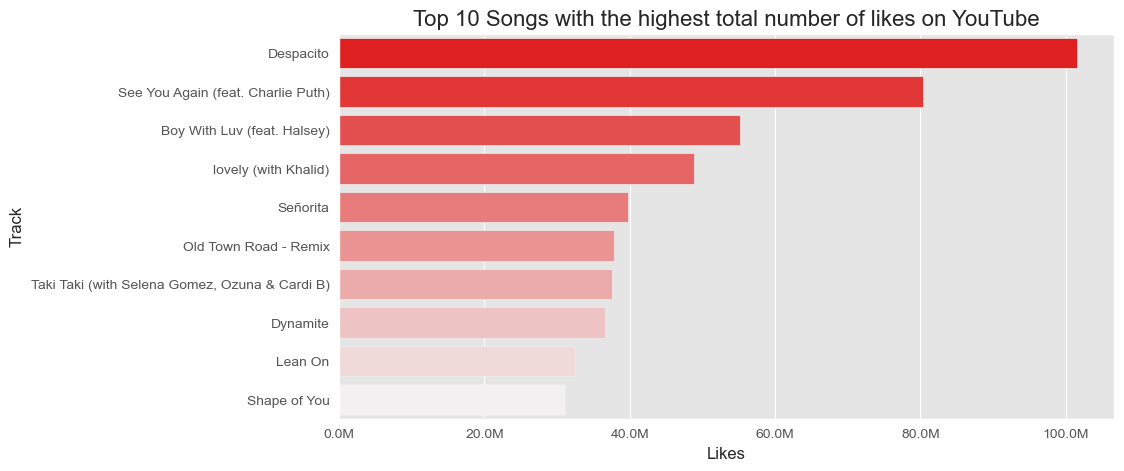

In [369]:
# Creating a barplot to visualize the top 10 Songs with the highest total number of likes on YouTube.
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=sl.values, y=sl.index, palette=youtube_palette)

# Formatting the X-axis to display values in Millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}M'.format(value*1e-6)))
ax.set_title('Top 10 Songs with the highest total number of likes on YouTube', fontsize=16)
ax.set_xlabel('Likes', fontsize=12)
ax.set_ylabel('Track', fontsize=12)
plt.show()

### Retrieving the top 10 Songs with highest total views on YouTube

In [370]:
tv = df.groupby('Track')['Views'].sum().sort_values(ascending=False).head(10)

In [371]:
tv

Track
Swalla (feat. Nicki Minaj & Ty Dolla $ign)       5162403752
Thrift Shop (feat. Wanz)                         4508467245
Something Just Like This                         4236043204
Sin Pijama                                       4172961620
Somebody That I Used To Know                     4114890942
Con Altura                                       4093098189
Bang Bang                                        4002768766
No Me Conoce - Remix                             3958118245
Sunflower - Spider-Man: Into the Spider-Verse    3954778068
Dusk Till Dawn (feat. Sia) - Radio Edit          3907550097
Name: Views, dtype: int64

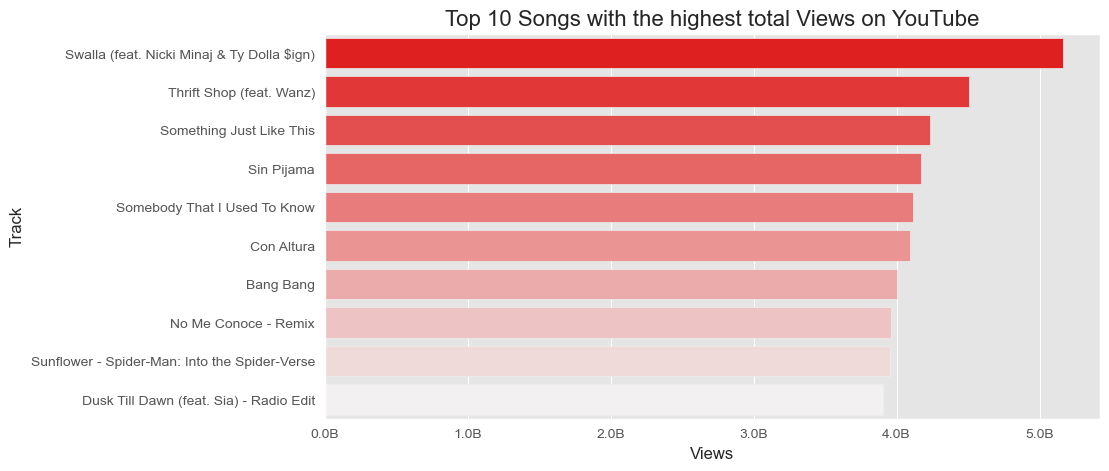

In [372]:
# visualizing the top 10 Songs with the highest number of Views on YouTube.
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=tv.values, y=tv.index, palette=youtube_palette)

# Formatting the X-axis to display values in Billions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}B'.format(value*1e-9)))
ax.set_title('Top 10 Songs with the highest total Views on YouTube', fontsize=16)
ax.set_xlabel('Views', fontsize=12)
ax.set_ylabel('Track', fontsize=12)

plt.show()

### Top 10 most liked Songs on YouTube with their Artists

In [373]:
lsa = df.groupby('Track').agg({'Likes':'sum','Artist':'sum'}).reset_index().sort_values(by='Likes',ascending=False).head(10)

In [374]:
lsa

Track      Likes  \
3435                                        Despacito  101577278   
12027              See You Again (feat. Charlie Puth)   80295292   
1981                      Boy With Luv (feat. Halsey)   55176413   
16271                            lovely (with Khalid)   48852042   
12151                                        Señorita   39692236   
10060                           Old Town Road - Remix   37889373   
13352  Taki Taki (with Selena Gomez, Ozuna & Cardi B)   37552053   
3878                                         Dynamite   36609928   
7698                                          Lean On   32422154   
12178                                    Shape of You   31047780   

                                        Artist  
3435                    Daddy YankeeLuis Fonsi  
12027                  Wiz KhalifaCharlie Puth  
1981                                 BTSHalsey  
16271                      KhalidBillie Eilish  
12151               Shawn MendesCamila Cabello  
10060  Billy Ray CyrusBilly Ray CyrusLil Nas X  
13352                        Selena GomezOzuna  
3878                              Taio CruzBTS  
7698                                DJ SnakeMØ  
12178                               Ed Sheeran

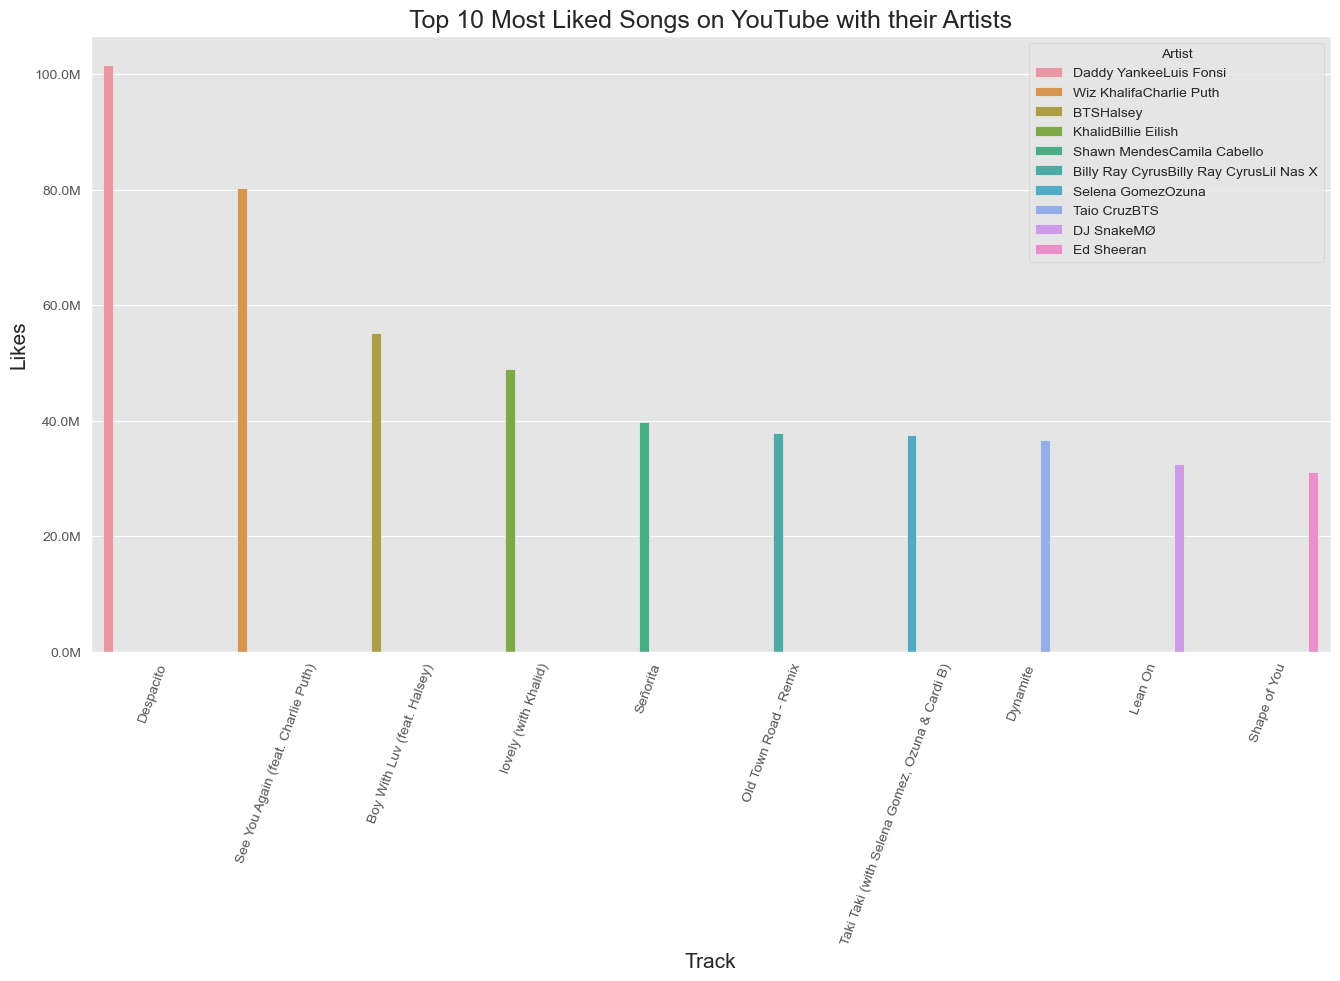

In [375]:
# Creating a bar plot to show the top 10 most Liked Songs on YouTube with their Artists.
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=lsa, x='Track', y='Likes', hue='Artist')

# Formatting the Y-axis to display values in Millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}M'.format(value*1e-6)))
ax.set_title('Top 10 Most Liked Songs on YouTube with their Artists', fontsize=18)
ax.set_xlabel('Track', fontsize=15)
ax.set_ylabel('Likes', fontsize=15)
plt.xticks(rotation=70)
plt.show()

### Top 10 Most Viewed Songs on YouTube with their Artists

In [376]:
vsa = df.groupby('Track').agg({'Views':'sum','Artist':'sum'}).reset_index().sort_values(by='Views',ascending=False).head(10)

In [219]:
vsa

Track       Views  \
13145     Swalla (feat. Nicki Minaj & Ty Dolla $ign)  5162403752   
14152                       Thrift Shop (feat. Wanz)  4508467245   
12669                       Something Just Like This  4236043204   
12412                                     Sin Pijama  4172961620   
12643                   Somebody That I Used To Know  4114890942   
2830                                      Con Altura  4093098189   
1480                                       Bang Bang  4002768766   
9682                            No Me Conoce - Remix  3958118245   
13071  Sunflower - Spider-Man: Into the Spider-Verse  3954778068   
3875         Dusk Till Dawn (feat. Sia) - Radio Edit  3907550097   

                                                  Artist  
13145               Jason DeruloNicki MinajTy Dolla $ign  
14152        MacklemoreRyan LewisMacklemore & Ryan Lewis  
12669                           ColdplayThe Chainsmokers  
12412                               Natti NatashaBecky G  
12643                           Elliott SmithGotyeKimbra  
2830                                     J BalvinROSALÍA  
1480   Benny DayalNicki MinajNeeti MohanJessie JSfera...  
9682                                      J BalvinJhayco  
13071                                Swae LeePost Malone  
3875                                             SiaZAYN

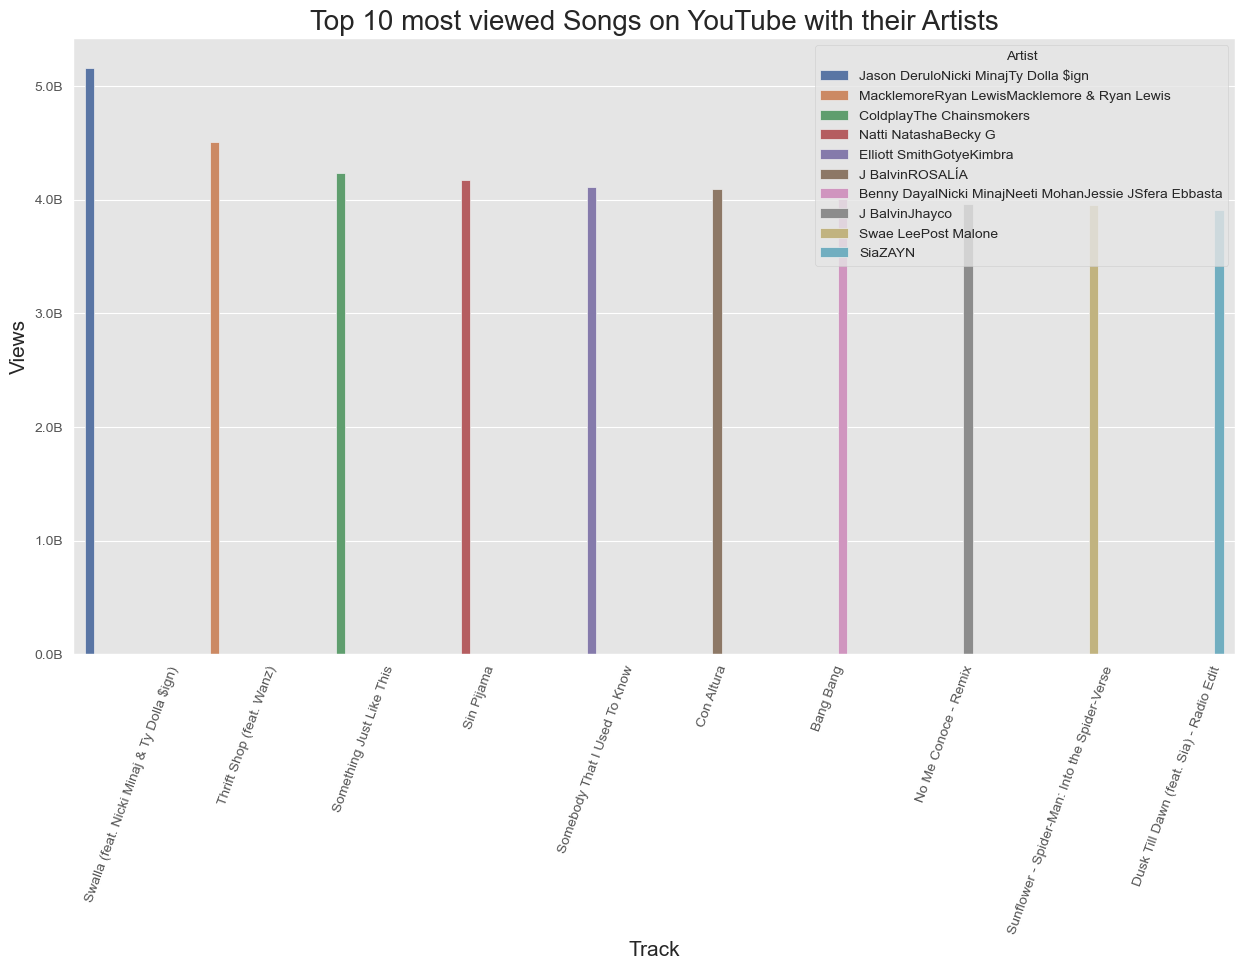

In [377]:
# Creating a bar plot to show the top 10 most Viewed Songs on YouTube with their Artists.
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=vsa, x='Track',y='Views',hue='Artist', palette = 'deep')

# Formatting the Y-axis to display values in Billions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}B'.format(value*1e-9)))
ax.set_title('Top 10 most viewed Songs on YouTube with their Artists', fontsize=20)
ax.set_xlabel('Track', fontsize=15)
ax.set_ylabel('Views', fontsize=15)
plt.xticks(rotation=70)
plt.show()

### Comparing the most-watched Songs on YouTube to the Songs by the total highest number of Streams on Spotify

In [378]:
df.groupby('Track').agg({'Views':'sum','Stream':'sum'}).reset_index().sort_values(by='Views',ascending=False).head(10)

Track       Views      Stream
13145     Swalla (feat. Nicki Minaj & Ty Dolla $ign)  5162403752  3031746321
14152                       Thrift Shop (feat. Wanz)  4508467245  2809621983
12669                       Something Just Like This  4236043204  4061651388
12412                                     Sin Pijama  4172961620  1420332218
12643                   Somebody That I Used To Know  4114890942  2658799744
2830                                      Con Altura  4093098189  1360901769
1480                                       Bang Bang  4002768766  2360284542
9682                            No Me Conoce - Remix  3958118245  2135471042
13071  Sunflower - Spider-Man: Into the Spider-Verse  3954778068 -4294967296
3875         Dusk Till Dawn (feat. Sia) - Radio Edit  3907550097  2756470410

In [379]:
df.groupby('Track').agg({'Views':'sum','Stream':'sum'}).reset_index().sort_values(by='Stream',ascending=False).head(10)

Track       Views  \
2345                    Can't Hold Us (feat. Ray Dalton)  3036616404   
5531                                             Happier  2494989607   
13864                                         The Middle   466742615   
3931                     Eastside (with Halsey & Khalid)  1269443225   
16271                               lovely (with Khalid)  3442782701   
4206   Enemy (with JID) - from the series Arcane Leag...  1185281403   
2720                             Cold Heart - PNAU Remix  1190742553   
12669                           Something Just Like This  4236043204   
12174                                            Shallow  2820304167   
10535             Peaches (feat. Daniel Caesar & Giveon)  1856761952   

           Stream  
2345   5225629104  
5531   4757615430  
13864  4566882832  
3931   4274887533  
16271  4221147558  
4206   4182327816  
2720   4072975437  
12669  4061651388  
12174  4008677756  
10535  4007515671

Several factors contribute to the disparity between the most-viewed songs on YouTube and the top songs on Spotify. Variations in audience preferences between the two platforms are a key factor—songs that resonate on YouTube may not garner the same level of popularity on Spotify. Furthermore, disparities in the algorithms employed by each platform for song recommendations and promotions contribute to divergent popularity. 
Lastly, the influence of marketing and promotion by artists and record labels cannot be overlooked, as it can significantly impact a song's popularity on each platform.

### Which Album type receives higher views on YouTube?

In [380]:
at = df.groupby('Album_type')['Views'].sum().reset_index().sort_values(by='Views', ascending=False)

In [229]:
at

Album_type          Views
0        album  1148761714701
2       single   330054880076
1  compilation    48829222463

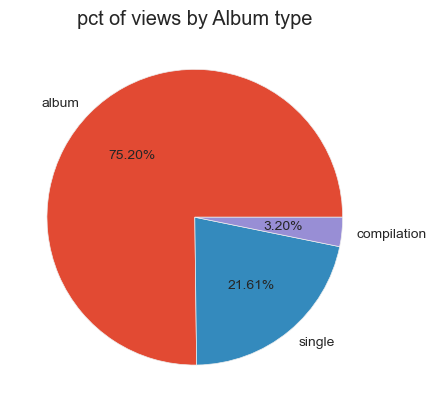

In [381]:
# Creating a pie chart to visualize Views by Album Type
plt.pie(data=at, x='Views',labels='Album_type', autopct='%.2f%%')
plt.title('pct of views by Album type')

plt.show()


Based on the above Pie chart, we can draw several conclusions. Firstly, the album type is the most popular category, representing 75.20% of the total views with a staggering  over "one trillion" views. Following album type, singles are the next most popular category, accounting for 21.61% of the total views with over "330 billion" views. Lastly, compilation type has the least popularity, representing only 3.20% of the total views with over "48,8 billions" views.

### Identifying the top 10 Albums with the highest number of views on YouTube.

In [382]:
VA = df.groupby('Album')['Views'].sum().reset_index().sort_values(by='Views',ascending=False).head(10)

In [383]:
VA

Album        Views
9452                                    The Heist  11240587663
8970   Swalla (feat. Nicki Minaj & Ty Dolla $ign)   5162403752
4296                         Hollywood's Bleeding   5100616676
4313                                      Homerun   4795982636
10263                                       VIVES   4736798332
6038                       Memories...Do Not Open   4635957165
9157                                Teenage Dream   4488764640
4555                                 Icarus Falls   4202640870
3953                                Greatest Hits   4199686140
5870                               Making Mirrors   4177867606

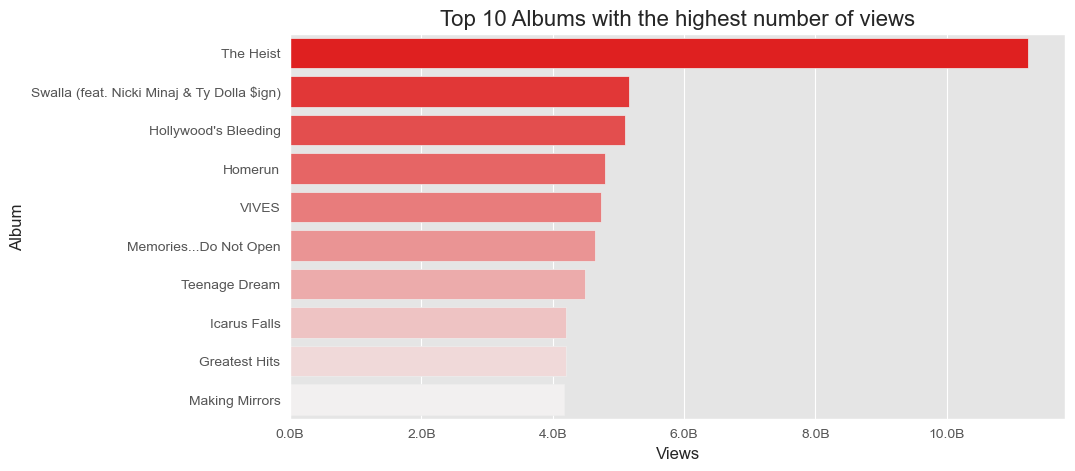

In [384]:
# visualizing the top 10 Albums with the highest total views on YouTube
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Views',y='Album',data=VA, palette=youtube_palette)

# Formatting the X-axis to display values in Billions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}B'.format(value*1e-9)))
ax.set_title('Top 10 Albums with the highest number of views', fontsize=16)
ax.set_xlabel('Views', fontsize=12)
ax.set_ylabel('Album', fontsize=12)

plt.show()

### Which album has garnered the highest number of comments on YouTube?

In [385]:
CA = df.groupby('Album')['Comments'].sum().reset_index().sort_values(by='Comments',ascending=False).head(10)

In [386]:
CA

Album  Comments
997                                    BE  16083138
5755            MAP OF THE SOUL : PERSONA  13071440
7501                                Proof  12221035
10259                                VIDA   9221901
1012                            BORN PINK   5400231
3725                Gangnam Style (강남스타일)   5331537
9011                            THE ALBUM   5130725
6398                         My World 2.0   4805805
8242   See You Again (feat. Charlie Puth)   4254691
7215                  Permission to Dance   3486944

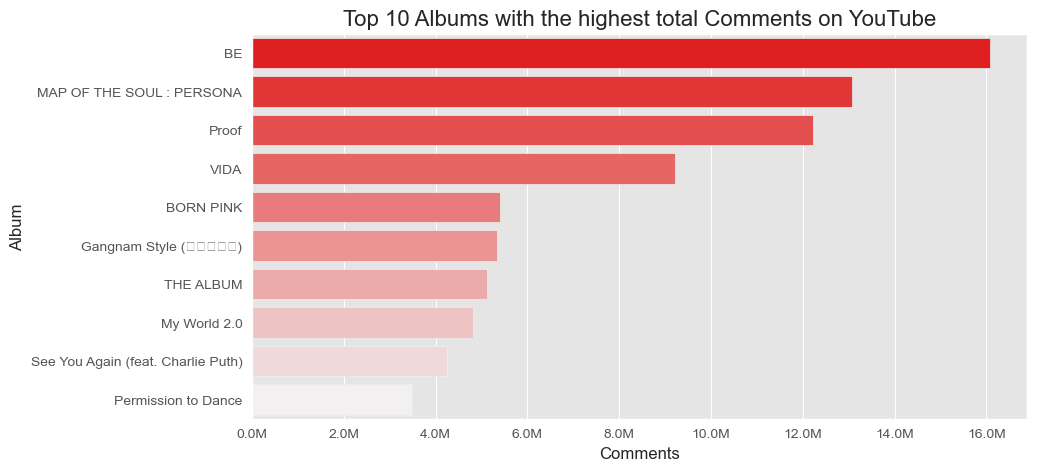

In [387]:
# visualizing the top 10 Albums with the highest total Comments on YouTube.
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Comments',y='Album',data=CA, palette=youtube_palette)

# Formatting the X-axis to display values in Millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}M'.format(value*1e-6)))
ax.set_title('Top 10 Albums with the highest total Comments on YouTube', fontsize=16)
ax.set_xlabel('Comments', fontsize=12)
ax.set_ylabel('Album', fontsize=12)

plt.show()

### Which album has received the highest number of Likes?

In [388]:
LA = df.groupby('Album')['Likes'].sum().reset_index().sort_values(by='Likes',ascending=False).head(10)

In [389]:
LA

Album      Likes
10259                                VIDA  123922855
8242   See You Again (feat. Charlie Puth)   80295292
9452                            The Heist   74964220
5755            MAP OF THE SOUL : PERSONA   55176413
11164                          ÷ (Deluxe)   53093334
11071                lovely (with Khalid)   48852042
2589                      Different World   46444440
10597      What Is Love? (Deluxe Edition)   43255756
237                                  7 EP   39698736
8349                Shawn Mendes (Deluxe)   39692236

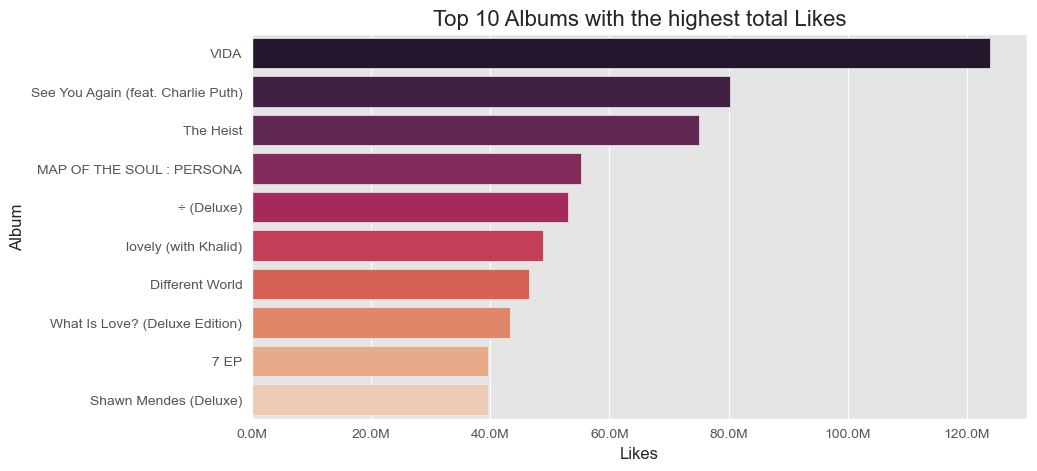

In [391]:
# visualizing the top 10 Albums with the highest total Likes on YouTube
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Likes',y='Album', data=LA, palette='rocket')

# Formatting the X-axis to display values in Millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}M'.format(value*1e-6)))
ax.set_title('Top 10 Albums with the highest total Likes', fontsize=16)
ax.set_xlabel('Likes', fontsize=12)
ax.set_ylabel('Album', fontsize=12)

plt.show()

### Which albums have received the highest total number of Streams on Spotify?

In [252]:
SA = df.groupby('Album')['Stream'].sum().reset_index().sort_values(by='Stream',ascending=False).head(10)

In [253]:
SA

Album      Stream
9452                        The Heist  9712794471
10149                Un Verano Sin Ti  8463684695
8039                             SOUR  8325355015
3671                 Future Nostalgia  7379888040
10597  What Is Love? (Deluxe Edition)  6874166758
10259                            VIDA  6634329409
4915                          Justice  6537340619
5786                          MONTERO  5858808607
94                                 17  5550560707
743        An Evening With Silk Sonic  5143922565

In [392]:
# visualizing the top 10 Albums with the highest total Streams on Spotify
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Stream',y='Album', data=SA, palette=spotify_palette)

# Formatting the X-axis to display values in Billions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}B'.format(value*1e-9)))
ax.set_title('Top 10 Albums with the highest total Streams on Spotify', fontsize=16)
ax.set_xlabel('Streams', fontsize=12)
ax.set_ylabel('Album', fontsize=12)

plt.show()

### Top 10 YouTube channels have the highest total number of likes?

In [394]:
CL = df.groupby('Channel')['Likes'].sum().reset_index().sort_values(by='Likes',ascending=False)[:10]

In [395]:
CL

Channel      Likes
4556          T-Series  348793719
1910       HYBE LABELS  251283465
459          BLACKPINK  131856733
2869     LuisFonsiVEVO  125771154
4175            SMTOWN  114711293
2985        Macklemore  112680815
1078       DJSnakeVEVO  108671915
577   BillieEilishVEVO   97020607
2745       LilNasXVEVO   96490325
1376        Ed Sheeran   95650055

In [396]:
# visualizing the top 10 YouTube Channels with the highest total Likes. 
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Likes', y='Channel', data=CL, palette=youtube_palette)

# Formatting the X-axis to display values in Millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}M'.format(value*1e-6)))
ax.set_title('Top 10 YouTube Channels with the highest total Likes', fontsize=16)
ax.set_xlabel('Likes', fontsize=12)
ax.set_ylabel('Channel', fontsize=12)

plt.show()

### Top 10 YouTube channels with the highest number of Views.

In [397]:
cv = df.groupby('Channel')['Views'].sum().reset_index().sort_values(by='Views',ascending=False).head(10)

In [398]:
cv

Channel        Views
4556            T-Series  47798638201
2985          Macklemore  17003410965
1937     Hear This Music  15088505405
690           Bruno Mars  13013566838
5315   Zee Music Company  12299740582
5229                 YRF  12221097510
4422  SonyMusicIndiaVEVO  11887793963
1910         HYBE LABELS  10046315339
459            BLACKPINK   9379494388
766     CalvinHarrisVEVO   8734115419

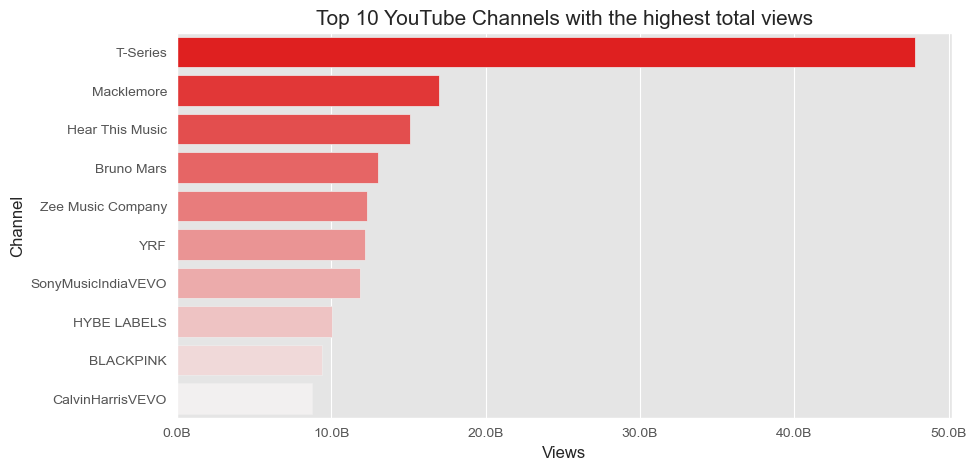

In [401]:
# visualizing the top 10 YouTube Channels with the highest total Views 
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Views', y='Channel', data=cv, palette=youtube_palette)

# Formatting the X-axis to display values in Billions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}B'.format(value*1e-9)))
ax.set_title('Top 10 YouTube Channels with the highest total views', fontsize=15)
ax.set_xlabel('Views', fontsize=12)
ax.set_ylabel('Channel', fontsize=12)

plt.show()


### Album Type Distribution

In [403]:
at = df['Album_type'].value_counts()
at

album          13845
single          4636
compilation      689
Name: Album_type, dtype: int64

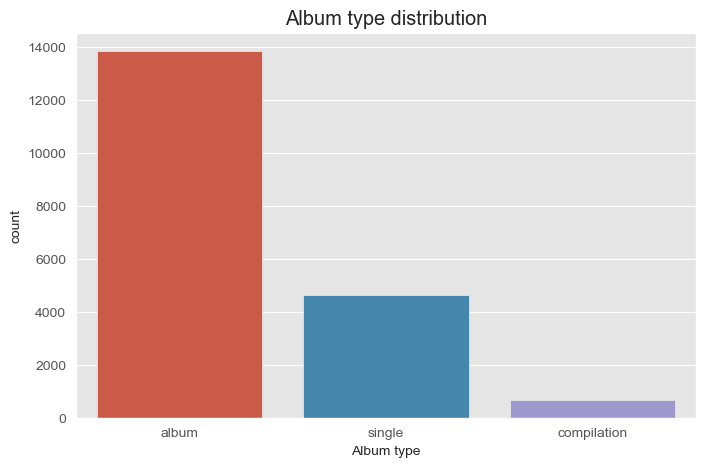

In [404]:
#Album type distribution
fig = plt.figure(figsize=(8,5))

sns.countplot(x='Album_type',data=df)
plt.xlabel('Album type', fontsize=10)
plt.title ('Album type distribution')
plt.show()

### Top 10 Licensed Albums on YouTube and Spotify.

In [405]:
la = df[df['Licensed'] == True]['Album'].value_counts().reset_index()[:10]

In [406]:
la

index  Album
0                 Greatest Hits     20
1             HEROES & VILLAINS     19
2                     Vida Cara     18
3   Tchaikovsky: The Nutcracker     17
4    An Evening With Silk Sonic     17
5  The Score (Expanded Edition)     13
6                     Resistiré     13
7                     The Heist     13
8       IL CORAGGIO DEI BAMBINI     12
9                   LITTLE LOVE     12

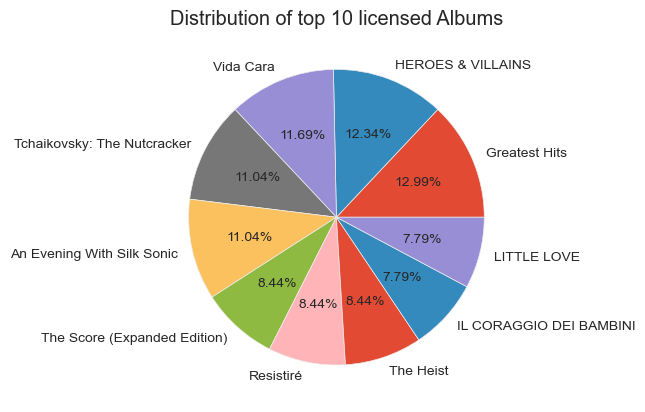

In [407]:
# Visualzing the Distribution Top 10 Licensed Albums on YouTube and Spotify
plt.pie(data=la,x='Album',labels='index',autopct='%.2f%%')
plt.title('Distribution of top 10 licensed Albums')

plt.show()



Among the albums, 'Heroes and Villains' stands out with the highest number of song distributors, totaling 12.34 records.

### The distribution of 'official_video' and 'Licensed' features.

In [408]:
df.groupby(['official_video', 'Licensed']).size()

official_video  Licensed
False           False        3950
True            False        1518
                True        13702
dtype: int64

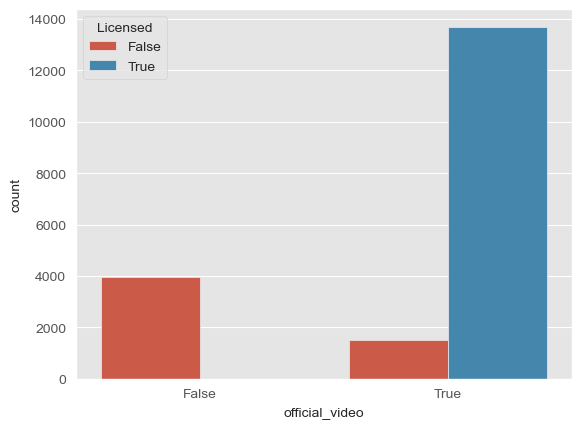

In [410]:
# Creating a countplot to visualize the distribution of 'official_video' and 'Licensed' features.
sns.countplot(x='official_video',hue='Licensed',data=df)
plt.show()

In [411]:
#Tracks danceability distribution
fig = plt.figure(figsize=(10,5))

d = sns.distplot(df['Danceability'],kde=True,bins=30, color='r')
d.set_xlabel('Danceability', fontsize=11)
d.set_title ('Danceability distribution')

plt.show()

In [412]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Description', 'Licensed',
       'official_video', 'Stream'],
      dtype='object')

### A Comprehensive analysis of different features of the top 10 most viewed songs

In [420]:
agg_table_top10 = df.groupby('Track').agg({'Views':'sum','Danceability':'sum','Energy':'sum','Energy':'sum','Speechiness':'sum','Energy':'sum','Liveness':'sum','Instrumentalness':'sum'}).reset_index().sort_values(by='Views',ascending=False)[:10]

In [421]:
agg_table_top10

Track       Views  \
13145     Swalla (feat. Nicki Minaj & Ty Dolla $ign)  5162403752   
14152                       Thrift Shop (feat. Wanz)  4508467245   
12669                       Something Just Like This  4236043204   
12412                                     Sin Pijama  4172961620   
12643                   Somebody That I Used To Know  4114890942   
2830                                      Con Altura  4093098189   
1480                                       Bang Bang  4002768766   
9682                            No Me Conoce - Remix  3958118245   
13071  Sunflower - Spider-Man: Into the Spider-Verse  3954778068   
3875         Dusk Till Dawn (feat. Sia) - Radio Edit  3907550097   

       Danceability  Energy  Speechiness  Liveness  Instrumentalness  
13145         2.088   2.451       0.3270    0.5610          0.000000  
14152         2.343   1.578       0.8790    0.1371          0.000000  
12669         1.234   1.270       0.0634    0.3280          0.000029  
12412         1.576   1.490       0.0896    0.1946          0.000091  
12643         2.304   1.357       0.1040    0.3224          0.000268  
2830          1.764   1.378       0.2480    0.1002          0.006500  
1480          3.375   3.670       0.3018    2.0930          0.000140  
9682          1.608   1.574       0.1492    0.1854          0.000000  
13071         1.510   1.044       0.1150    0.1370          0.000000  
3875          0.518   0.874       0.0772    0.2120          0.000003

In [426]:
fig, ax=plt.subplots(figsize=(15,8))
plt.title("A Comprehensive Analysis of the Top 10 Most Viewed Songs' Features")
sns.lineplot(x='Track', y='Danceability', data=agg_table_top10, label='Danceability')
sns.lineplot(x='Track', y='Energy',data=agg_table_top10, label='Energy')
sns.lineplot(x='Track', y='Speechiness',data=agg_table_top10, label='Speechiness')
sns.lineplot(x='Track', y='Liveness',data=agg_table_top10, label='Liveness')
sns.lineplot(x='Track', y='Instrumentalness',data=agg_table_top10, label='Instrumentalness')
plt.xticks(rotation=70)

plt.show()

### Creating a Pairplot for the numerical variables

In [427]:
ax = sns.pairplot(df, vars=['Danceability', 'Energy', 'Loudness', 'Speechiness',
                        'Valence', 'Acousticness','Liveness','Views','Stream', 'Tempo']
             ,palette='deep',kind='scatter', diag_kind='kde', height=3, corner=True)
ax.fig.suptitle('Pairplot for the numerical variables', y=1, fontsize=35, fontweight='bold', ha='center')
ax.fig.subplots_adjust(top=0.95)
ax.fig.show()
plt.show()

### Creating a histogram to visualize all the important features of Songs

In [428]:
df.hist(bins=40,figsize=(20,16))
plt.show()

### Creating a Pairplot for the most important numerical features

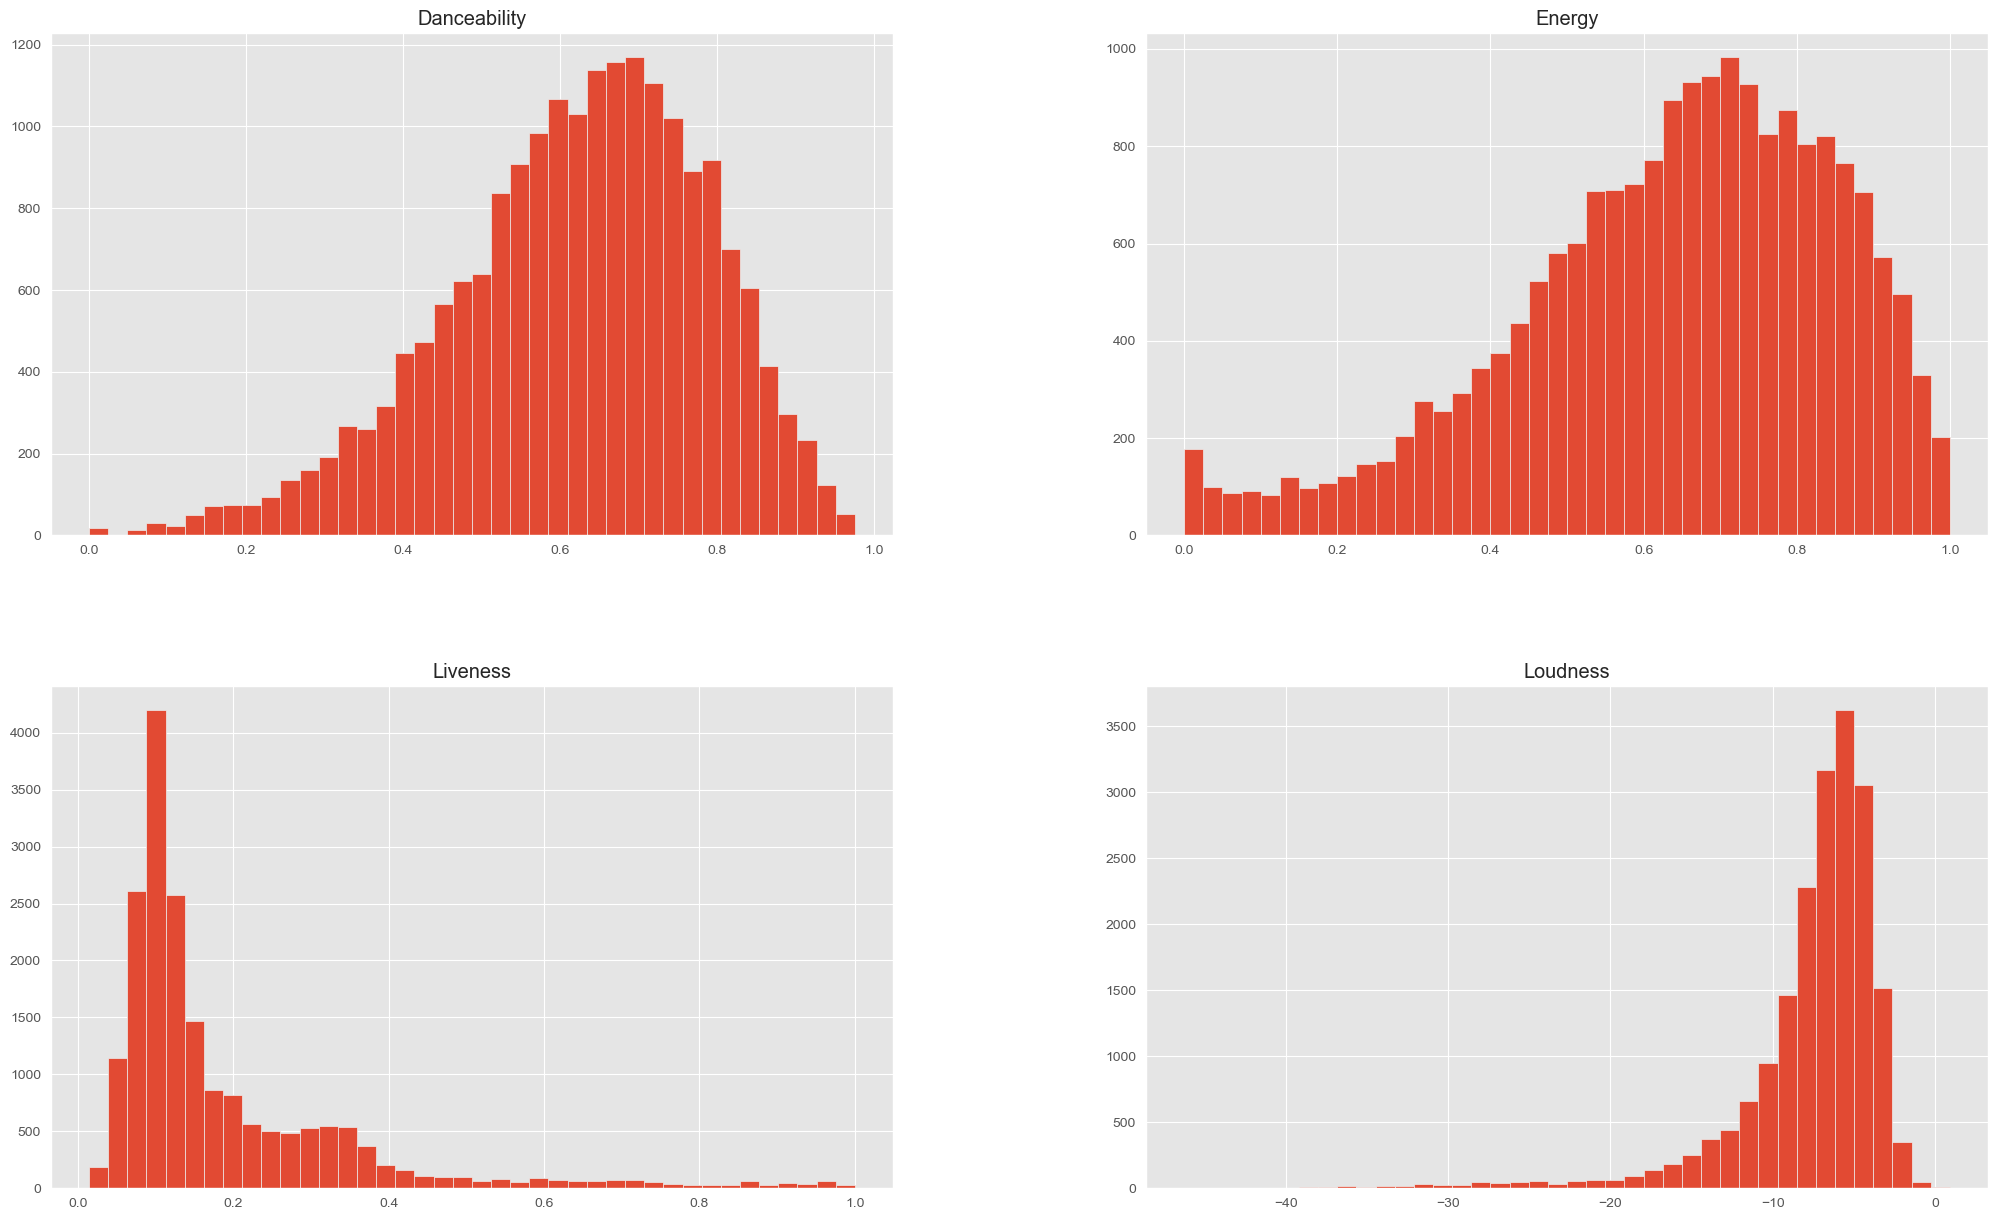

In [429]:
df.hist(['Danceability','Energy','Liveness','Loudness'],bins=40,figsize=(25,15))

plt.show()

### Creating a Pairplot of the most important numerical features

In [430]:
ax = sns.pairplot(data=df, vars=['Danceability', 'Energy','Stream','Loudness']
                  ,kind='scatter', diag_kind='kde', height=3, corner=True)
ax.fig.suptitle('Pairplot of the most important numerical features', y=1, fontsize=20, fontweight='bold', ha='center')
ax.fig.subplots_adjust(top=0.95)
ax.fig.show()
plt.show()




### Correlation between features using matrix heatmap

In [431]:
plt.figure(figsize=(11,6))
sns.heatmap(df.corr(),linewidth=0.6,annot=True, fmt='.1f',cmap='YlGnBu')
plt.title('Spotify-YouTube.corr()')
plt.xticks(rotation=80)
plt.show()

The disparity between the most-viewed songs on YouTube and the top songs on Spotify can be attributed to several factors. Divergent audience preferences between the two platforms contribute to this discrepancy, as songs that resonate on YouTube may not enjoy the same level of popularity on Spotify. Furthermore, variations in the algorithms employed by each platform for song recommendations and promotions result in contrasting song popularities. Additionally, marketing and promotion efforts by artists and record labels also influence the popularity of songs on each platform.

In [306]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Description', 'Licensed',
       'official_video', 'Stream'],
      dtype='object')

### Let's see if there's a relationship between views and likes on YouTube videos with their Album type

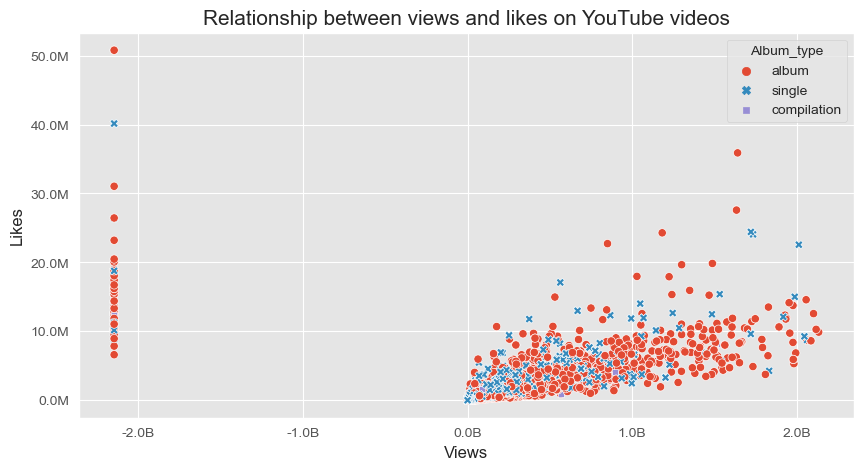

In [454]:
# visualizing the relation between views and likes on YouTube videos
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='Views', y='Likes', data=df, hue='Album_type', style="Album_type")

# Formatting the X-axis and Y-axis to display values in Millions and Billions.
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}B'.format(value*1e-9)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}M'.format(value*1e-6)))

# Add labels and title
ax.set_title('Relationship between views and likes on YouTube videos', fontsize=15)
ax.set_xlabel('Views', fontsize=12)
ax.set_ylabel('Likes', fontsize=12)

plt.show()


### Showing the Relationship between Likes and Comments with their album type.

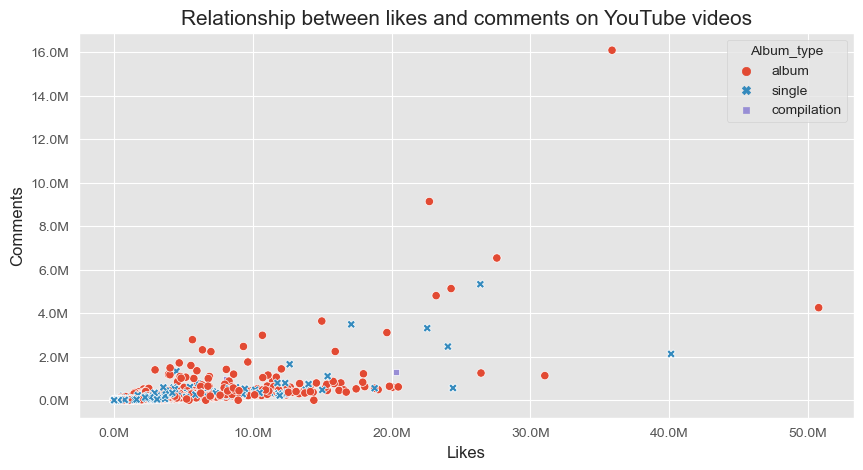

In [453]:
# visualizing the relation between likes and comments on YouTube videos with their album type.
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='Likes', y='Comments', data=df, hue='Album_type', style="Album_type")

# Formatting the X-axis and Y-axis to display values in Millions.
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}M'.format(value*1e-6)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda value, position:'{:,.1f}M'.format(value*1e-6)))

# Adding labels and title
ax.set_title('Relationship between likes and comments on YouTube videos', fontsize=15)
ax.set_xlabel('Likes', fontsize=12)
ax.set_ylabel('Comments', fontsize=12)

plt.show()

### Correlation between Views and Streams.

In [434]:
sns.lmplot(x='Views',y='Stream',data=df,line_kws={'color':'g'})

plt.show()

### Exploring the correlation between Acoustiness and Energy.

In [435]:
sns.jointplot(x='Acousticness',y='Energy',data=df,kind='hex')
plt.show()

A track with high acousticness features mainly acoustic instruments like guitar, piano, or strings, while a track with low acousticness is dominated by electronic instruments. When energy increases in a track, the presence of acoustic instruments tends to decrease, showing a negative correlation between energy and acousticness. Similarly, as loudness increases, the acousticness tends to decrease, indicating a pattern between loudness and acousticness.

### Exploring the correlation between Energy and Loudness.


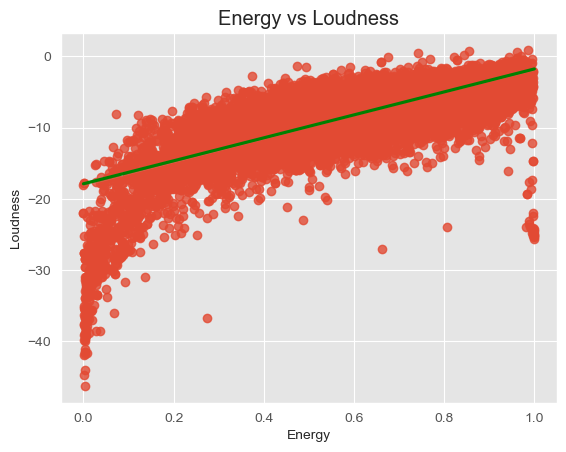

In [438]:
sns.regplot(x='Energy',y='Loudness',data=df,line_kws={'color':'g'})
plt.title('Energy vs Loudness')
plt.show()

### Correlation between Speechiness and Tempo in Songs

<Figure size 1000x500 with 0 Axes>

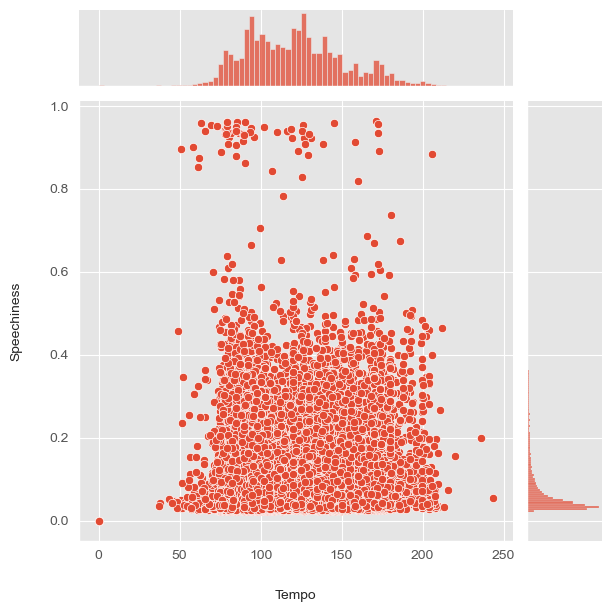

In [442]:
fig = plt.figure(figsize=(10,5))
sns.jointplot(data=df,x='Tempo',y='Speechiness',kind='scatter')
plt.xlabel("Tempo", labelpad=20)
plt.ylabel("Speechiness", labelpad=20)
plt.axis('tight')

plt.show()

A noticeable correlation exists between speechiness and tempo in songs. Faster tempo songs tend to have a higher level of speechiness.

### Exploring the Relatonship between Tempo and Key

In [445]:
sns.jointplot(data=df,x='Tempo',y='Key',kind='hist')

plt.show()

### Analyzing the Relationship between Liveness and Speechiness

In [448]:
sns.jointplot(data=df,x = 'Instrumentalness', y = 'Liveness', kind = 'scatter')
plt.show()

### Relationship between Speechiness Instrumentalness

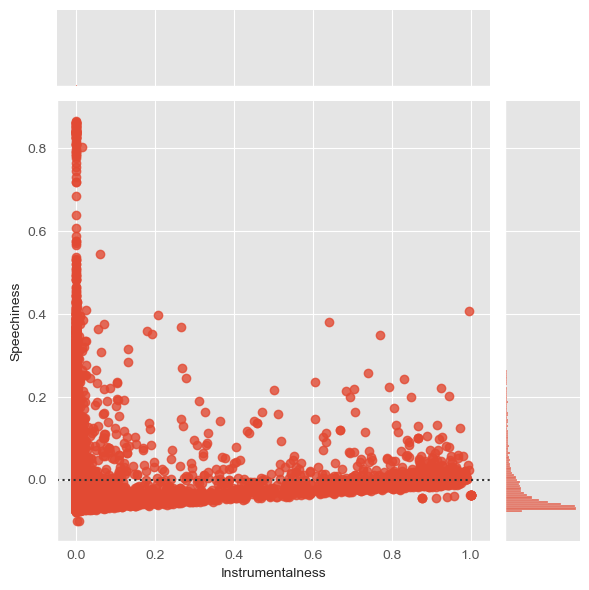

In [160]:
sns.jointplot(data=df,x='Instrumentalness',y='Speechiness',kind='resid')
plt.show()

Usually, speechiness and instrumentalness show an inverse relationship. Songs with higher speechiness tend to have lower instrumentalness. This is because genres like spoken word or rap focus on lyrics and vocals, while instrumental music emphasizes the musical composition itself.

### The Relationship between Instrumentalness and Acousticness

In [450]:
sns.jointplot(data=df,x='Instrumentalness',y='Acousticness',kind='resid')
plt.show()


### Relationship between Danceability and Energy

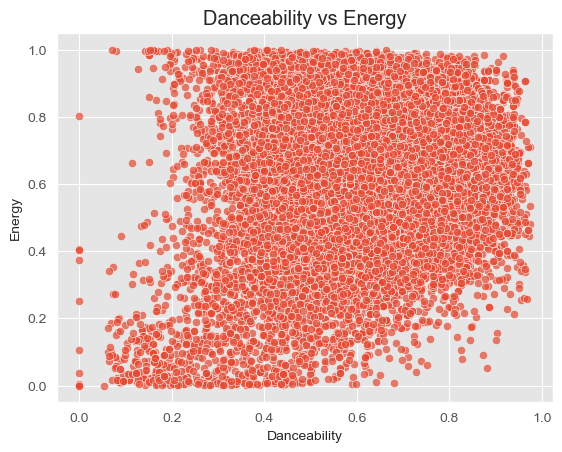

In [163]:
#Simple scatter plot (Danceability vs Energy) - we can see that there is a positive correlation between the two variables
ax = sns.scatterplot(data=df, x='Danceability', y='Energy', alpha=0.7)
ax.set_title('Danceability vs Energy')
plt.show()

Danceability and energy are closely related, as songs with high danceability tend to have a high energy level too. This connection arises from the fact that danceable songs usually feature a strong and consistent beat that encourages movement, aligning with a high-energy sound.

### Relationship between Loudness and Energy

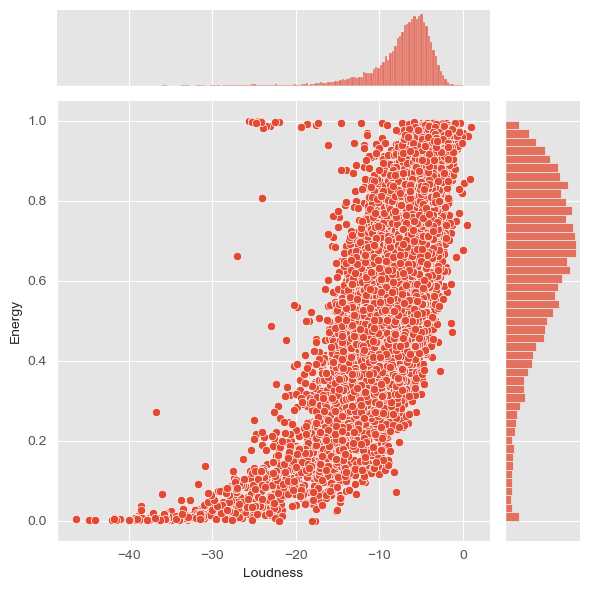

In [165]:
sns.jointplot(data = df, x = 'Loudness', y = 'Energy', kind = 'scatter')
plt.show()

 There's a strong positive correlation between loudness and energy in tracks

### Relationship between Valence and Energy 

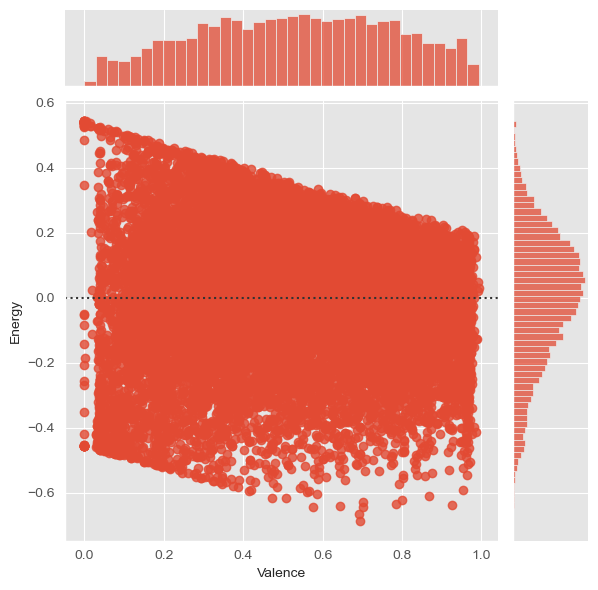

In [166]:
sns.jointplot(data =df, x = 'Valence', y = 'Energy', kind = 'resid')
plt.show()

Energy and valence often show a positive correlation, indicating that songs with high energy levels tend to have a more positive emotional tone. This connection can be attributed to the fact that high-energy songs often feature an upbeat and lively sound associated with positive emotions like happiness and excitement.



# Conclusion


Through this comprehensive project, we have delved into the fascinating world of music streaming and social media to uncover the remarkable milestones achieved by various artists and songs. 

- "Dua Lipa" firmly claimed the top position with an impressive 13.4 billion streams on Spotify, closely followed by "XXXTENTACION" and "Coldplay" with 12 billion and 11 billion streams.

- On YouTube, "Bruno Mars" achieved an incredible milestone, amassing a staggering 10.23 billion views, securing the top spot, while "Macklemore & Ryan Lewis" and "Coldplay" closely followed with 10.12 billion and 10 billion views, respectively.

- "BTS" emerged as an unstoppable force on the digital stage, dominating with a record-breaking 39.5 million comments, securing the top spot in YouTube comments. Meanwhile, their massive fan following translated into social media popularity, as they emerged as the most liked artist with an astounding 139.4 million likes. "BLACKPINK" and Charlie Puth also gained significant admiration, securing the second and third positions with 132.3 million and 86.3 million likes, respectively.

- Among the top streamed songs on Spotify, "Can't Hold Us (feat. Ray Dalton)" stole the show with an impressive 5.2 billion streams, closely followed by "Happier" and "The Middle" with over 4.7 billion and 4.5 billion streams, respectively.

- On YouTube, "Despacito" reigned supreme, amassing a staggering 101 million likes, with "See You Again (feat. Charlie Puth)" and "Boy With Luv (feat. Halsey)" securing the second and third positions with 80 million and 55 million likes, respectively.

- In terms of YouTube views, "Swalla (feat. Nicki Minaj & Ty Dolla $ign)" captured the top spot with an impressive 5 billion views, followed by "Thrift Shop (feat. Wanz)" and "Something Just Like This" with 4.5 billion and 4.2 billion views.

- Our exploration of album types revealed that "Albums" were overwhelmingly dominant, representing a significant 75% of the total data, outshining compilation and single types.

- Among the top albums on YouTube, "The Heist" garnered the highest number of views, amassing a total of 11.2 billion, with "Swalla (feat. Nicki Minaj & Ty Dolla $ign)" and "Hollywood's Bleeding" securing the second and third positions with 5.1 billion views each.

- On the other hand, "Album Vida" emerged as the most popular album in terms of likes, amassing a total of 120 million, with "See You Again" and "The Heist" closely following in the second and third positions with 80 million and 74 million likes, respectively.

- Notably, "Vida" defied the trend by garnering higher likes while also being the most commented song, receiving a positive response from the audience.

- In the realm of streaming, "The Heist" maintained its popularity, securing the top spot with an impressive total of 9.7 billion streams on Spotify. "Un Verano Sin Ti" and "SOUR" followed closely in the second and third positions with 8.4 billion and 8.3 billion streams, respectively.

- Finally, we explored intriguing correlations between song traits, revealing a noticeable link between speechiness and tempo in songs. Faster tempos tended to exhibit a higher level of speechiness, while songs with higher speechiness often had a lower level of instrumentalness, highlighting the emphasis on lyrics and vocal delivery, particularly in spoken word or rap.

Overall, this project offers valuable insights into the ever-changing music industry, shedding light on the influence of streaming platforms and social media on an artist's success. The data and trends presented here will undoubtedly serve as a valuable resource for understanding the dynamic landscape of music and the preferences of modern audiences.
